# Assignment - Telecom Churn Case Study
### Niladri Banerjee

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

pd.options.display.max_colwidth = 200
pd.options.display.max_rows=300
pd.options.display.max_columns=500

### Read the data

In [2]:
data = pd.read_csv("telecom_churn_data.csv")

In [3]:
data.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [4]:
data.shape

(99999, 226)

### Function definitions

In [5]:
def get_missing_values(df, threshold = 0):
    """
        1. Prints missing data %
        2. Returns the missing data dataframe
    """
    missing_data = 100*data.isnull().sum()/len(data.index)    
    missing_data = missing_data[missing_data > threshold]
    #print(missing_data)
    return missing_data

In [6]:
def treat_missing_values(df, threshold_percent_delete = 50):    
    """
        1. Find missing values in terms of %
        2. Remove the cols from dataframe with high missing value. high missing value will be determined by threshold provided
        3. collect all null cols
        4. imputing all object variables with mode of the respective columns
        5. imputing all int and float with median of the respective columns
    """
    
    percent_missing = df.isnull().sum() * 100 / len(df)
    
    missing_value_df = pd.DataFrame({'column_name': df.columns,
                                    'percent_missing': percent_missing})
    
    # delete all columns beyond threshold_percent_delete
    df =  df.loc[:,missing_value_df[missing_value_df['percent_missing'] < threshold_percent_delete]['column_name']]
    
    # checking null values
    NA_col = df.isnull().sum()
    
    # find out columns which have nulls
    NA_col = NA_col[NA_col > 0]
    
    # imputing all object variables with mode of the respective columns
    # imputing all int and float with median of the respective columns

    for col in NA_col.index:
        if df[col].dtype.name == 'object':
            # impute mode
            df[col].fillna(data[col].mode()[0], inplace=True)
            
        elif df[col].dtype.name == 'float64' or df[col].dtype.name == 'int64' or df[col].dtype.name == 'int32':
            # impute median
            df[col] = df[col].fillna((df[col].median()))
            
        else:
            print('Unable to detect the datatype for col - ', col)            
    return df

In [7]:
def univariate(df, col, title = "",xlabel = "",vartype = 0, rot=0):
    """
        1. Find missing values in terms of %
        2. Remove the cols from dataframe with high missing value. high missing value will be determined by threshold provided
        3. collect all null cols
        4. imputing all object variables with mode of the respective columns
        5. imputing all int and float with median of the respective columns
    """    
    if vartype == 0: # For discrete variable
        plt.figure(figsize=(12,8))
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel('Counts [%]')    
        values = (df[col].value_counts() * 100 / len(df)).sort_values(ascending = False)
        values.plot(kind="line", color='red')
        ax = values.plot(kind="bar", grid=True, rot=rot)
        
        for p in ax.patches:
            ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x() + 0.2, p.get_height() + 1))
            
    else: # For Continous variable
        fig, ax=plt.subplots(nrows =1,ncols=2,figsize=(20,10))
        ax[0].set_title("Distribution Plot")
        sns.distplot(df[col],ax=ax[0])        
        ax[1].set_title("Box Plot")
        sns.boxplot(data = df, x=col,ax=ax[1],orient='v')

In [8]:
def bivariate_bar(df,xcol,title=None,ycol=None,hue=None,rot=0,cols=2):
    
    bivariate_df = df.copy()
    sns.set(style="whitegrid")
    
    if cols == 2:
        plt.figure(figsize=(20,12))
        plt.title(title)
        plt.xlabel(xcol)
        
        ax = sns.barplot(x=xcol, y=ycol, hue=hue, data=bivariate_df)

        for p in ax.patches:
            ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x(), p.get_height() + 2))
    
        for item in ax.get_xticklabels():
            item.set_rotation(rot)
            
    else:
        plt.figure(figsize=(20,12))        
        ax = sns.countplot(x=xcol, order=bivariate_df[xcol].value_counts().index, hue=hue, data=bivariate_df)
        
        for p in ax.patches:
            ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(bivariate_df))), (p.get_x()+0.15, p.get_height()+20))

In [9]:
def col_capping_and_check_skewness(df):
    # Multi variable outlier treatment using capping
    cols_skewness = pd.DataFrame()

    for col in df.columns:
        if col != 'churn':
            low = df[col].quantile(0.01)
            high = df[col].quantile(0.99)
            skew_before = df[col].skew()

            df[col] = np.where(df[col] < low, low, df[col])
            df[col] = np.where(df[col] > high, high, df[col])

            skew_after = df[col].skew()
            cols_skewness = cols_skewness.append(pd.DataFrame([[col,skew_before,skew_after]]
                                                              , columns=['column','before_capping_skew','post_capping_skew']))
    return df, cols_skewness

In [10]:
def get_vif_summary(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [11]:
def get_unique_values_in_cols(df):
    cols = df.columns
    unique_val_cnt = pd.DataFrame(columns=['col_name', 'unique_cnt'])

    for col in cols:
        unique_cnt = df[col].nunique()
        unique_val_cnt=unique_val_cnt.append(pd.DataFrame([[col, unique_cnt]], columns=['col_name', 'unique_cnt']))

    return (unique_val_cnt.sort_values(['unique_cnt']))

In [12]:
# Ref: https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            specificity = cf[0,0]/sum(cf[0,:])

            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}%\nRecall={:0.3f}%\nSpecificity={:0.3f}%\nF1 Score={:0.3f}%".format(100*accuracy,100*precision,100*recall,100*specificity,100*f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
   
    if title:
        plt.title(title)

In [13]:
def roc_auc_score(y, y_pred_prob):
    # evaluate predictions
    roc = metrics.roc_auc_score(y, y_pred_prob[:, 1])
    print("AUC: %.2f%%" % (roc * 100.0))

In [14]:
def runGridSearchCV(algo, X_train, y_train, params, n_folds, scoring):
    
    # fit tree on training data
    gridSearch = GridSearchCV(algo, params, cv=n_folds, scoring=scoring, return_train_score=True)
    gridSearch.fit(X_train, y_train)
    
    #print grid result
    print(pd.DataFrame(gridSearch.cv_results_))
    print('We can get accuracy of',gridSearch.best_score_,'using',gridSearch.best_params_)
    
    return gridSearch

In [15]:
def plotGridSearchResult(cv_results, ctgryParam,ctgryParamName, xParamName, scoring):
    
    # plotting AUC with hyperparameter combinations

    plt.figure(figsize=(16,6))
    for n, ctgryVal in enumerate(ctgryParam):
        
        # subplot 1/n
        plt.subplot(1,3, n+1)
        depth_df = cv_results[cv_results[ctgryParamName]==ctgryVal]

        plt.plot(depth_df[xParamName], depth_df["mean_test_score"])
        plt.plot(depth_df[xParamName], depth_df["mean_train_score"])
        plt.xlabel(xParamName)
        plt.ylabel(scoring)
        plt.title("{0}={1}".format(ctgryParamName, ctgryVal))
        plt.ylim([0.60, 1])
        plt.legend(['test score', 'train score'], loc='upper left')
        plt.xscale('log')

In [16]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [17]:
def plotDistribtionAndOtherPlotsForUnivariate(df, col_name):
    fig , axes = plt.subplots(1,2, figsize= (12,4))
    sns.distplot(df[col_name], ax=axes[0])
    sns.boxplot(df[col_name], ax=axes[1])
    
    axes[0].set_title('dist plot')
    axes[1].set_title('box plot')
    plt.show()

In [18]:
def bivariatePlots(df, col_name, plot_name):
    if(plot_name == 'catplot'):
        g = sns.catplot(x="churn", y=col_name, data=df);
        g.set_axis_labels(plot_name)
        
    if(plot_name == 'lineplot'):
        sns.lineplot(df[col_name],df['churn'])

### Cleansing & Missing Data Treatment

In [19]:
wrong_cols =[]
for col in data.columns:
    if('jun' in col or 'jul' in col or 'aug' in col or 'sep' in col):
        wrong_cols.append(col)

wrong_cols

['aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g']

In [20]:
data = data.rename(columns=
            {'jun_vbc_3g':'vbc_3g_6',
             'jul_vbc_3g':'vbc_3g_7',
             'aug_vbc_3g':'vbc_3g_8',
             'sep_vbc_3g':'vbc_3g_9'
            }
           )

In [21]:
wrong_cols =[]
for col in data.columns:
    if('jun' in col or 'jul' in col or 'aug' in col or 'sep' in col):
        wrong_cols.append(col)

wrong_cols

[]

- columns renamed successfully

In [22]:
missing_values_df = get_missing_values(data)
missing_values_df

loc_og_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_ic_t2o_mou               1.018010
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_7                3.859039
roam_og_mou_8                5.378054
roam_og_mou_9                7.745077
loc_og_t2t_mou_6             3.937039
loc_og_t2t_mou_7             3.859039
loc_og_t2t_mou_8             5.378054
loc_og_t2t_mou_9             7.745077
loc_og_t2m_m

In [23]:
# Checking columns having more than 50% missing
more_than_50_pct_missing_cols = get_missing_values(df = data, threshold = 50).index
more_than_50_pct_missing_cols

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9',
       'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6',
       'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'av_rech_amt_data_9', 'arpu_3g_6', 'arpu_3g_7',
       'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
       'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9'],
      dtype='object')

In [24]:
# all the above columns are consistently missing values, so it is safe to replace NaN with zero
num_cols = data[more_than_50_pct_missing_cols].select_dtypes(include='number').columns
num_cols

Index(['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6',
       'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'av_rech_amt_data_9', 'arpu_3g_6', 'arpu_3g_7',
       'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
       'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9'],
      dtype='object')

In [25]:
data[num_cols] = data[num_cols].fillna(0)

In [26]:
missing_data = get_missing_values(data,0)
missing_data

loc_og_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_ic_t2o_mou               1.018010
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_7                3.859039
roam_og_mou_8                5.378054
roam_og_mou_9                7.745077
loc_og_t2t_mou_6             3.937039
loc_og_t2t_mou_7             3.859039
loc_og_t2t_mou_8             5.378054
loc_og_t2t_mou_9             7.745077
loc_og_t2m_m

In [27]:
# below percents are for columns which are consistently missing for 6,7,8 and 9 months
missing_pct=[3.937039,3.859039,5.378054,7.745077]
missing_col_impute_set_1 = missing_data[round(missing_data,6).isin(missing_pct)].index
missing_col_impute_set_1

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9',
       'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9',
       'roam_ic_mou_6', 'roam_ic_mou_7',
       ...
       'spl_ic_mou_8', 'spl_ic_mou_9', 'isd_ic_mou_6', 'isd_ic_mou_7',
       'isd_ic_mou_8', 'isd_ic_mou_9', 'ic_others_6', 'ic_others_7',
       'ic_others_8', 'ic_others_9'],
      dtype='object', length=116)

In [28]:
# So imputing these cols with zero
data[missing_col_impute_set_1] = data[missing_col_impute_set_1].fillna(0)

In [29]:
# Let us check the last_date_of_month_ columns
print('last_date_of_month_6 :', data['last_date_of_month_6'].value_counts())
print('last_date_of_month_7 :', data['last_date_of_month_7'].value_counts())
print('last_date_of_month_8 :', data['last_date_of_month_8'].value_counts())
print('last_date_of_month_9 :', data['last_date_of_month_9'].value_counts())

last_date_of_month_6 : 6/30/2014    99999
Name: last_date_of_month_6, dtype: int64
last_date_of_month_7 : 7/31/2014    99398
Name: last_date_of_month_7, dtype: int64
last_date_of_month_8 : 8/31/2014    98899
Name: last_date_of_month_8, dtype: int64
last_date_of_month_9 : 9/30/2014    98340
Name: last_date_of_month_9, dtype: int64


In [30]:
# filling only for 6, 7 and 8 month data as we will later drop 9th month data
data['last_date_of_month_6'] = data['last_date_of_month_6'].fillna('6/30/2014')
data['last_date_of_month_7'] = data['last_date_of_month_7'].fillna('7/31/2014')
data['last_date_of_month_8'] = data['last_date_of_month_8'].fillna('8/31/2014')

In [31]:
# assign all date columns
date_cols=[ 'date_of_last_rech_6'
           ,'date_of_last_rech_7'
           ,'date_of_last_rech_8'
           ,'date_of_last_rech_data_6'
           ,'date_of_last_rech_data_7'
           ,'date_of_last_rech_data_8']

In [32]:
# Computing the last_date_rech only for 6,7 and 8 months, as we will later drop 9th month data
# We are imputing a default date of Jan 1, 2014 if values are missing
last_date_rech = data[date_cols].applymap(lambda x: '1/1/2014' if (pd.isnull(x)) else x)

In [33]:
last_date_rech.head()

date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8  \
0           6/21/2014           7/16/2014            8/8/2014   
1           6/29/2014           7/31/2014           8/28/2014   
2           6/17/2014           7/24/2014           8/14/2014   
3           6/28/2014           7/31/2014           8/31/2014   
4           6/26/2014           7/28/2014            8/9/2014   

  date_of_last_rech_data_6 date_of_last_rech_data_7 date_of_last_rech_data_8  
0                6/21/2014                7/16/2014                 8/8/2014  
1                 1/1/2014                7/25/2014                8/10/2014  
2                 1/1/2014                 1/1/2014                 1/1/2014  
3                 1/1/2014                 1/1/2014                 1/1/2014  
4                 6/4/2014                 1/1/2014                 1/1/2014

In [34]:
data['last_rech_date'] = last_date_rech.astype('datetime64').max(axis=1)

data[['last_date_of_month_8']] = data[['last_date_of_month_8']].astype('datetime64')
data['srvc_not_used_since_days'] = data['last_date_of_month_8']-data['last_rech_date']

data['srvc_not_used_since_days'] = data['srvc_not_used_since_days'].apply(lambda x: x.days)
data[date_cols].head()

date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8  \
0           6/21/2014           7/16/2014            8/8/2014   
1           6/29/2014           7/31/2014           8/28/2014   
2           6/17/2014           7/24/2014           8/14/2014   
3           6/28/2014           7/31/2014           8/31/2014   
4           6/26/2014           7/28/2014            8/9/2014   

  date_of_last_rech_data_6 date_of_last_rech_data_7 date_of_last_rech_data_8  
0                6/21/2014                7/16/2014                 8/8/2014  
1                      NaN                7/25/2014                8/10/2014  
2                      NaN                      NaN                      NaN  
3                      NaN                      NaN                      NaN  
4                 6/4/2014                      NaN                      NaN

In [35]:
data['srvc_not_used_since_days'].value_counts()

0      14706
1      11707
2      10057
3       9817
5       9297
7       7720
6       7656
4       5688
9       2017
11      1987
8       1806
12      1590
10      1347
13      1027
22       984
26       943
17       891
16       813
15       757
14       735
19       719
18       703
23       676
25       617
20       555
24       446
21       360
37       262
30       254
32       226
45       214
29       206
31       195
46       188
27       170
38       144
28       127
35       126
47       117
36       113
33       101
242       99
39        99
53        98
34        96
42        96
40        92
52        78
43        63
50        62
41        49
78        48
48        47
44        47
58        43
54        42
84        41
56        37
80        34
75        32
59        32
79        31
68        31
62        31
76        30
65        29
51        29
74        29
66        28
55        25
60        25
64        25
49        24
71        24
57        23
67        23
81        23

In [36]:
# There are 99 customers who have not been paying since 242 days. Assuming they are not paying the bills annually, 
# we can consider checking this point amoung high value customers

In [37]:
# Drop Date Columns as we have derived feature now.
data.drop(date_cols, axis=1, inplace=True)

data.drop([ 'last_rech_date'
           ,'last_date_of_month_6'
           ,'last_date_of_month_7'
           ,'last_date_of_month_8'
           ,'last_date_of_month_9'
           ,'date_of_last_rech_9'
           ,'date_of_last_rech_data_9'], axis=1, inplace=True)

data.shape

(99999, 215)

In [38]:
missing_data = get_missing_values(data,0)
missing_data

loc_og_t2o_mou    1.01801
std_og_t2o_mou    1.01801
loc_ic_t2o_mou    1.01801
dtype: float64

#### missing value treatment

In [39]:
data.shape

(99999, 215)

In [40]:
data = treat_missing_values(data)

In [41]:
data.shape

(99999, 215)

In [42]:
missing_data = get_missing_values(data,0)
missing_data

Series([], dtype: float64)

In [43]:
# Check all unique values in cols
unique_val_cols = get_unique_values_in_cols(data)
unique_val_cols

col_name unique_cnt
0          std_ic_t2o_mou_6          1
0          std_og_t2c_mou_6          1
0          std_og_t2c_mou_7          1
0          std_og_t2c_mou_8          1
0          std_og_t2c_mou_9          1
0          std_ic_t2o_mou_9          1
0          std_ic_t2o_mou_8          1
0          std_ic_t2o_mou_7          1
0                 circle_id          1
0            loc_og_t2o_mou          1
0            std_og_t2o_mou          1
0            loc_ic_t2o_mou          1
0                 fb_user_6          2
0                 fb_user_9          2
0                 fb_user_8          2
0          night_pck_user_6          2
0                 fb_user_7          2
0          night_pck_user_8          2
0          night_pck_user_9          2
0          night_pck_user_7          2
0              monthly_2g_9          5
0              monthly_2g_6          5
0              monthly_2g_7          6
0              monthly_2g_8          6
0              monthly_3g_9         11
0              monthly_3g_6         12
0              monthly_3g_8         12
0              monthly_3g_7         15
0           count_rech_3g_6         25
0               sachet_3g_6         25
0               sachet_3g_9         27
0               sachet_3g_7         27
0           count_rech_3g_9         27
0           count_rech_3g_7         28
0           count_rech_3g_8         29
0               sachet_3g_8         29
0           count_rech_2g_6         31
0           count_rech_2g_9         32
0               sachet_2g_9         32
0               sachet_2g_6         32
0               sachet_2g_8         34
0           count_rech_2g_8         34
0               sachet_2g_7         35
0           count_rech_2g_7         36
0         total_rech_data_9         38
0         total_rech_data_6         38
0         total_rech_data_7         43
0         total_rech_data_8         47
0           max_rech_data_6         49
0           max_rech_data_7         49
0           max_rech_data_8         51
0           max_rech_data_9         51
0              spl_ic_mou_6         84
0  srvc_not_used_since_days         93
0          total_rech_num_8         96
0          total_rech_num_9         97
0          total_rech_num_7        101
0              spl_ic_mou_8        102
0          total_rech_num_6        102
0              spl_ic_mou_7        107
0        last_day_rch_amt_7        173
0            max_rech_amt_7        183
0        last_day_rch_amt_9        185
0        last_day_rch_amt_6        186
0               og_others_7        187
0        last_day_rch_amt_8        199
0            max_rech_amt_9        201
0            max_rech_amt_6        202
0            max_rech_amt_8        213
0               og_others_8        216
0               og_others_9        235
0              spl_ic_mou_9        384
0        av_rech_amt_data_6        888
0        av_rech_amt_data_9        946
0        av_rech_amt_data_7        962
0        av_rech_amt_data_8        974
0               og_others_6       1018
0              isd_og_mou_9       1255
0              isd_og_mou_8       1276
0              isd_og_mou_7       1380
0              isd_og_mou_6       1381
0               ic_others_6       1817
0               ic_others_8       1896
0               ic_others_9       1923
0               ic_others_7       2002
0          loc_og_t2c_mou_6       2235
0          std_og_t2f_mou_9       2295
0          total_rech_amt_9       2304
0          total_rech_amt_6       2305
0          total_rech_amt_7       2329
0          loc_og_t2c_mou_9       2332
0          std_og_t2f_mou_8       2333
0          total_rech_amt_8       2347
0          std_og_t2f_mou_7       2391
0          loc_og_t2c_mou_7       2426
0          std_og_t2f_mou_6       2450
0          loc_og_t2c_mou_8       2516
0          std_ic_t2f_mou_8       3051
0          std_ic_t2f_mou_9       3090
0          std_ic_t2f_mou_6       3125
0          std_ic_t2f_mou_7       3209
0                       aon       3489
0 

In [44]:
# dropping all columns having only 1 unique value through out
data.drop(unique_val_cols[unique_val_cols['unique_cnt']==1]['col_name'],axis=1,inplace = True)

In [45]:
data.shape

(99999, 203)

In [46]:
data.dtypes

mobile_number                 int64
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float64
roam_og_mou_6               float64
roam_og_mou_7               float64
roam_og_mou_8               float64
roam_og_mou_9               float64
loc_og_t2t_mou_6            float64
loc_og_t2t_mou_7            float64
loc_og_t2t_mou_8            float64
loc_og_t2t_mou_9            float64
loc_og_t2m_mou_6            float64
loc_og_t2m_mou_7            float64
loc_og_t2m_mou_8            

In [47]:
# for months = 6 and 7, find the top 30% customer
# create a derived column avg_amt_6_7 = ( total_rech_amt_6 + total_rech_amt_7 ) / 2
data['avg_amt_6_7'] = ( data['total_rech_amt_6'] + data['total_rech_amt_7'] ) / 2

# Drop columns.
data.drop(['total_rech_amt_6','total_rech_amt_7'], axis=1, inplace=True)

In [48]:
data.head()

mobile_number   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0     7000842753  197.385  214.816  213.803   21.100         0.00   
1     7001865778   34.047  355.074  268.321   86.285        24.11   
2     7001625959  167.690  189.058  210.226  290.714        11.54   
3     7001204172  221.338  251.102  508.054  389.500        99.91   
4     7000142493  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0         0.00         0.00         0.00          0.00          0.00   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00          0.00            0.0           0.00           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0           0.00            0.0           0.00           0.00           0.00   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0              0.00              0.00              0.00              0.00   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0              0.00              0.00              0.00              0.00   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0              0.00              0.00              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              4.91              2.06   
4              0.00              0.00              0.00              1.93   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
0               0.0              0.00              0.00              0.00   
1               0.0              2.91              0.00              0.00   
2               0.0            135.54             45.76              0.48   
3               0.0              0.00              0.00              0.00   
4               0.0              0.00              0.00              0.00   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
0          0.00          0.00          0.00          0.00              0.00   
1         35.39        150.51        299.54         72.11              0.23   
2         60.66         67.41         67.66         64.81              4.34   
3        183.03        118.68        

#### cleansing & missing data treatment complete

#### filter high value customers

In [49]:
data['avg_amt_6_7'].describe(percentiles=[0,0.1,0.2,0.3,0.4,0.50,0.6,0.7,0.8,0.90,.99,1])

count    99999.000000
mean       325.238792
std        370.833466
min          0.000000
0%           0.000000
10%         60.000000
20%         99.500000
30%        134.500000
40%        178.000000
50%        229.000000
60%        287.500000
70%        368.500000
80%        485.000000
90%        698.000000
99%       1590.000000
100%     37762.500000
max      37762.500000
Name: avg_amt_6_7, dtype: float64

In [50]:
# Select top 30% customers
# data_hvc = high value customer
data_hvc = data[data['avg_amt_6_7'] > data['avg_amt_6_7'].quantile(0.7)]

In [51]:
data_hvc.shape

(29979, 202)

In [52]:
data_hvc.head()

mobile_number    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
7      7000701601  1069.180  1349.850  3171.480  500.000        57.84   
8      7001524846   378.721   492.223   137.362  166.787       413.69   
13     7002191713   492.846   205.671   593.260  322.732       501.76   
16     7000875565   430.975   299.869   187.894  206.490        50.51   
17     7000187447   690.008    18.980    25.499  257.583      1185.91   

    onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
7         54.68        52.29         0.00        453.43        567.16   
8        351.03        35.08        33.46         94.66         80.63   
13       108.39       534.24       244.81        413.31        119.28   
16        74.01        70.61        31.34        296.29        229.74   
17         9.28         7.79       558.51         61.64          0.00   

    offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
7         325.91          0.00          16.23          33.49          31.64   
8         136.48        108.71           0.00           0.00           0.00   
13        482.46        214.06          23.53         144.24          72.11   
16        162.76        224.39           0.00           2.83           0.00   
17          5.54         87.89           0.00           4.76           4.81   

    roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
7            0.00          23.74          12.59          38.06           0.00   
8            0.00           0.00           0.00           0.00           0.00   
13         136.78           7.98          35.26           1.44          12.78   
16           0.00           0.00          17.74           0.00           0.00   
17           0.00           0.00           8.46          13.34          17.98   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
7              51.39             31.38             40.28              0.00   
8             297.13            217.59             12.49             26.13   
13             49.63              6.19             36.01              6.14   
16             42.61             65.16             67.38             26.88   
17             38.99              0.00              0.00             36.41   

    loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
7             308.63            447.38            162.28              0.00   
8              80.96             70.58             50.54             34.58   
13            151.13             47.28            294.46            108.24   
16            273.29            145.99            128.28            201.49   
17             58.54              0.00              0.00              9.38   

    loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
7              62.13             55.14             53.23              0.00   
8               0.00              0.00              0.00              0.00   
13              4.54              0.00             23.51              5.29   
16              0.00              4.48             10.26              4.66   
17              0.00              0.00              0.00              0.00   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
7                0.0               0.0              0.00               0.0   
8                0.0               0.0              7.15               0.0   
13               0.0               0.0              0.49               0.0   
16               0.0               0.0              0.00               0.0   
17               0.0               0.0              0.00               0.0   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
7         422.16        533.91        255.79          0.00              4.30   
8         378.09        288.18         63.04         60.71            116.56   
13        205.31         53.48        353.99    

In [53]:
# assign churn based on the following condition
data_hvc['churn'] = np.where(( 
                          (data_hvc['total_ic_mou_9']==0) & 
                          (data_hvc['total_og_mou_9']==0) & 
                          (data_hvc['vol_2g_mb_9']==0) & 
                          (data_hvc['vol_3g_mb_9']==0)
                         ), 1, 0)

In [54]:
data_hvc.head()

mobile_number    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
7      7000701601  1069.180  1349.850  3171.480  500.000        57.84   
8      7001524846   378.721   492.223   137.362  166.787       413.69   
13     7002191713   492.846   205.671   593.260  322.732       501.76   
16     7000875565   430.975   299.869   187.894  206.490        50.51   
17     7000187447   690.008    18.980    25.499  257.583      1185.91   

    onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
7         54.68        52.29         0.00        453.43        567.16   
8        351.03        35.08        33.46         94.66         80.63   
13       108.39       534.24       244.81        413.31        119.28   
16        74.01        70.61        31.34        296.29        229.74   
17         9.28         7.79       558.51         61.64          0.00   

    offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
7         325.91          0.00          16.23          33.49          31.64   
8         136.48        108.71           0.00           0.00           0.00   
13        482.46        214.06          23.53         144.24          72.11   
16        162.76        224.39           0.00           2.83           0.00   
17          5.54         87.89           0.00           4.76           4.81   

    roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
7            0.00          23.74          12.59          38.06           0.00   
8            0.00           0.00           0.00           0.00           0.00   
13         136.78           7.98          35.26           1.44          12.78   
16           0.00           0.00          17.74           0.00           0.00   
17           0.00           0.00           8.46          13.34          17.98   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
7              51.39             31.38             40.28              0.00   
8             297.13            217.59             12.49             26.13   
13             49.63              6.19             36.01              6.14   
16             42.61             65.16             67.38             26.88   
17             38.99              0.00              0.00             36.41   

    loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
7             308.63            447.38            162.28              0.00   
8              80.96             70.58             50.54             34.58   
13            151.13             47.28            294.46            108.24   
16            273.29            145.99            128.28            201.49   
17             58.54              0.00              0.00              9.38   

    loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
7              62.13             55.14             53.23              0.00   
8               0.00              0.00              0.00              0.00   
13              4.54              0.00             23.51              5.29   
16              0.00              4.48             10.26              4.66   
17              0.00              0.00              0.00              0.00   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
7                0.0               0.0              0.00               0.0   
8                0.0               0.0              7.15               0.0   
13               0.0               0.0              0.49               0.0   
16               0.0               0.0              0.00               0.0   
17               0.0               0.0              0.00               0.0   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
7         422.16        533.91        255.79          0.00              4.30   
8         378.09        288.18         63.04         60.71            116.56   
13        205.31         53.48        353.99    

In [55]:
# Dropping all 9 months columns otherwise it may lead to overfitting
all_9_cols = []
for col in data_hvc.columns:
    if '_9' in col:
        all_9_cols.append(col)

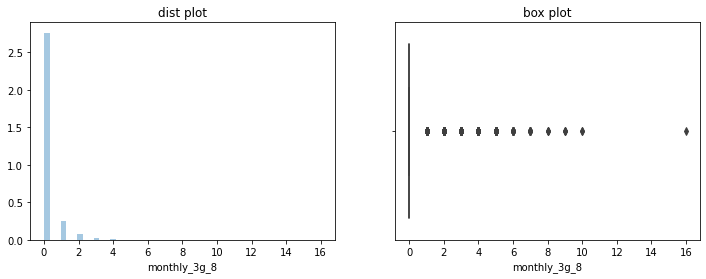

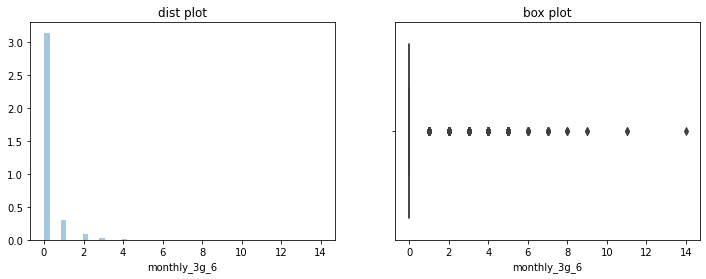

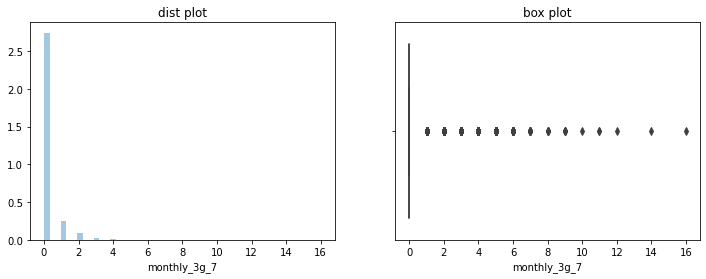

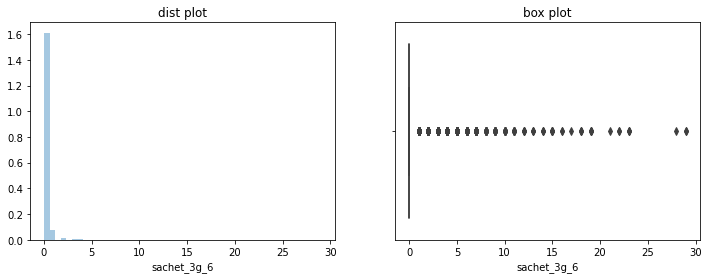

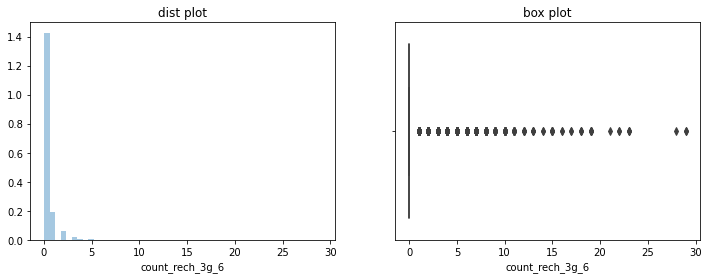

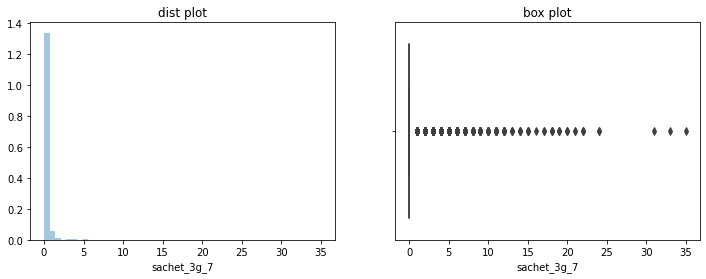

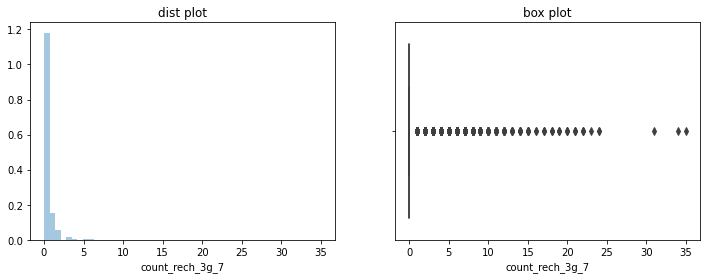

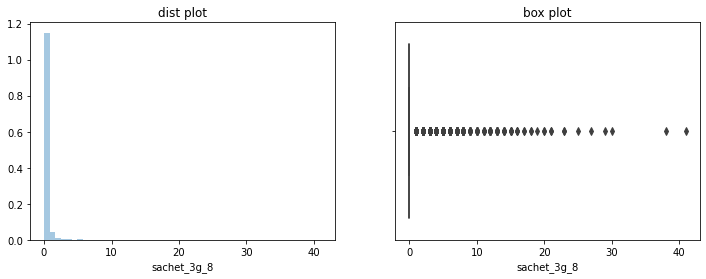

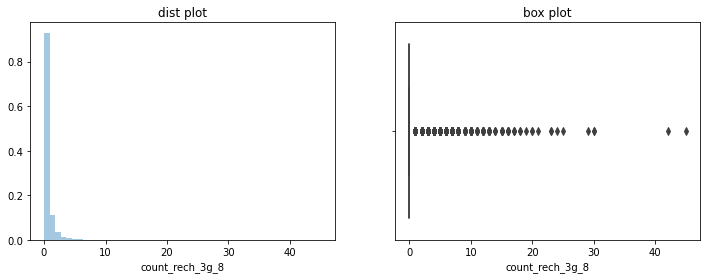

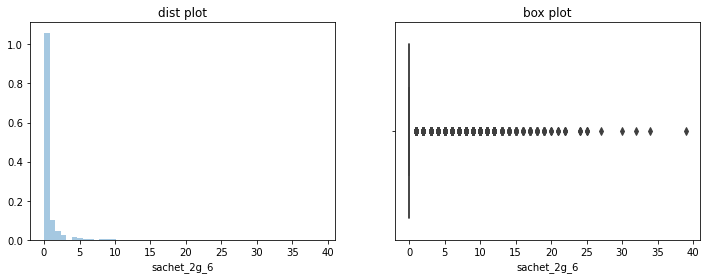

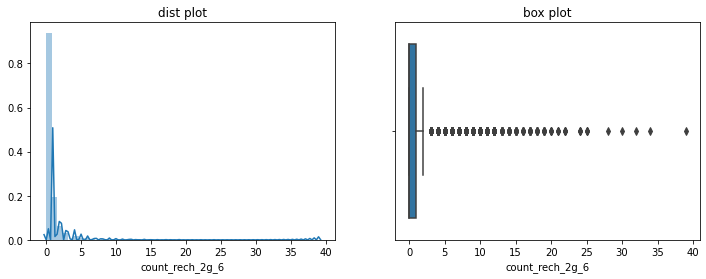

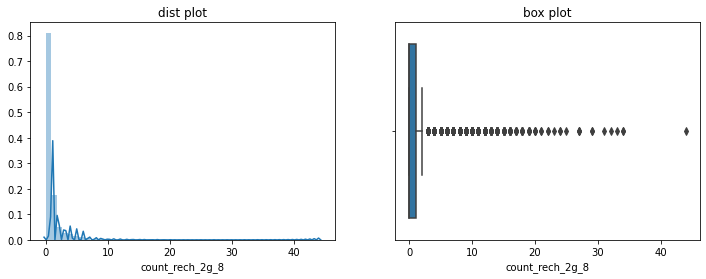

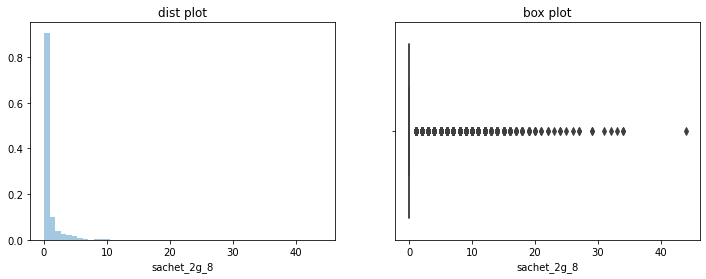

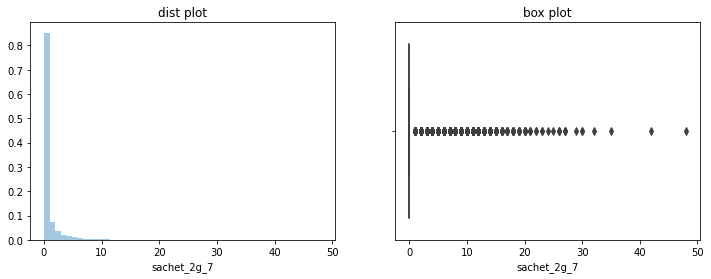

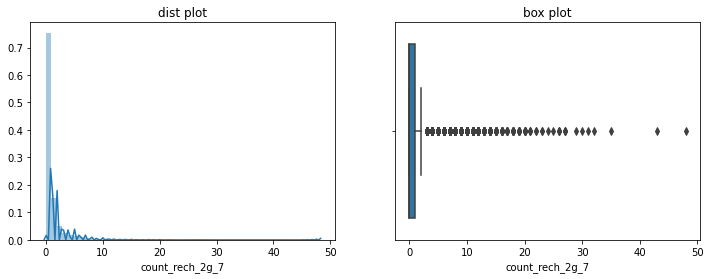

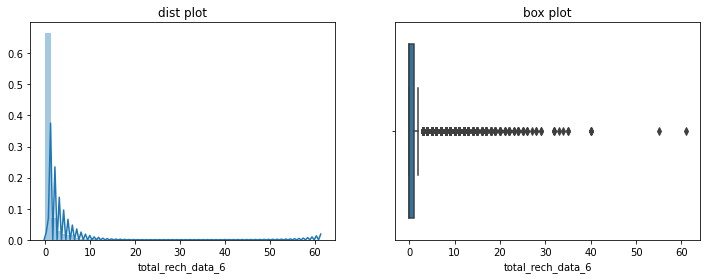

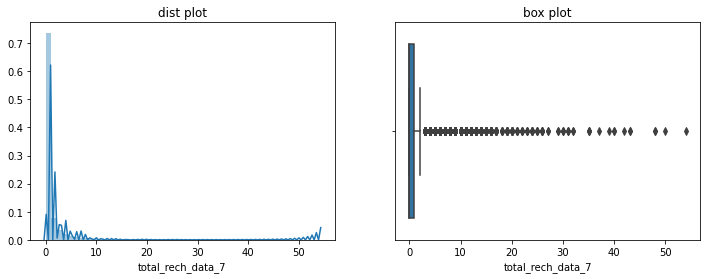

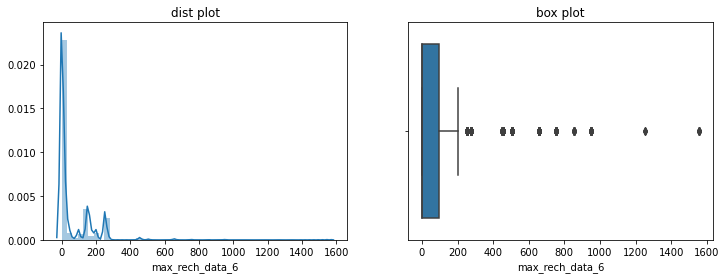

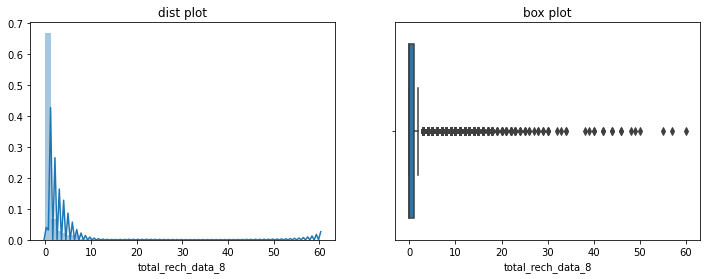

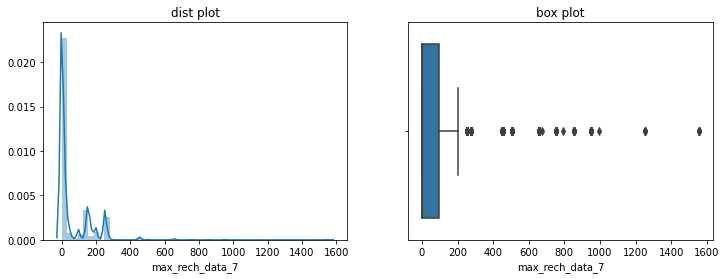

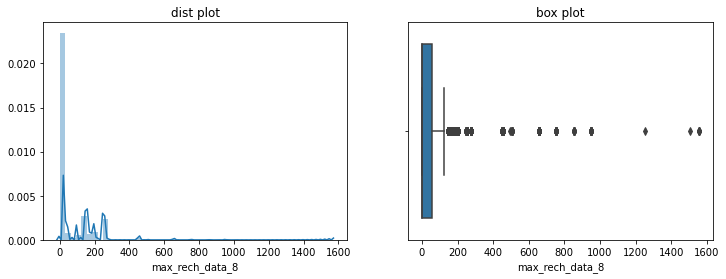

In [56]:
# Check all unique values in cols
unique_val_cols = get_unique_values_in_cols(data_hvc)
# Randomily picking columns having unique values between 10 and 30 for univariate analysis
random_univariate_cols = unique_val_cols[(unique_val_cols.unique_cnt >10) & (unique_val_cols.unique_cnt <=50)].col_name

random_univariate_cols = [col for col in random_univariate_cols if col not in all_9_cols]

for col in random_univariate_cols:
    plotDistribtionAndOtherPlotsForUnivariate(data_hvc,col)

- looking at the above univariate plots, it is evident that data set is highly skewed and have lots of outliers
- later stage, before modeling, we would be treating ouliers to reduce the skewness

## Bivariate Analysis (relation between random columns with churn)

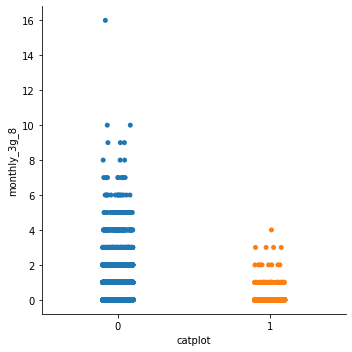

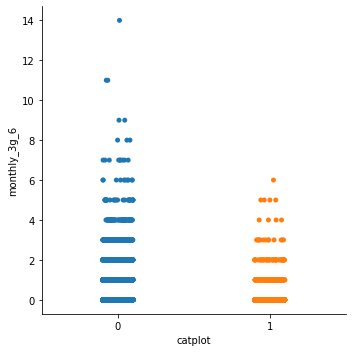

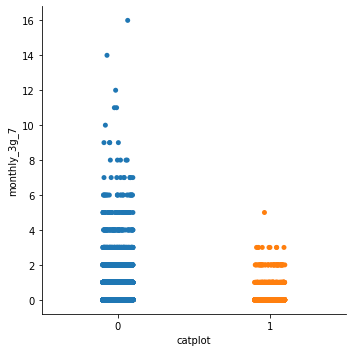

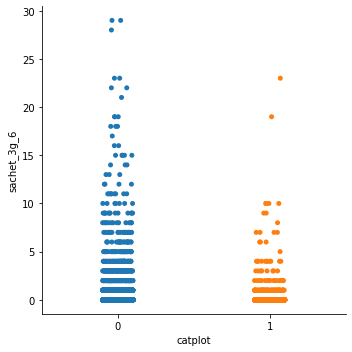

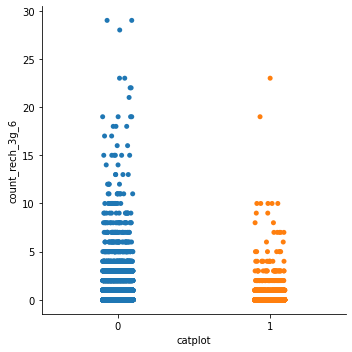

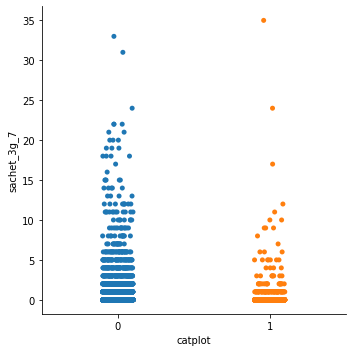

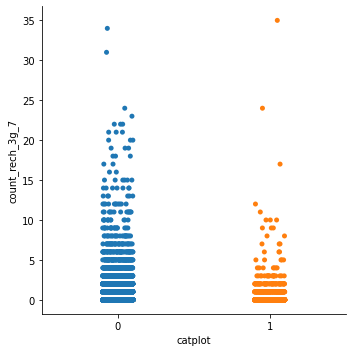

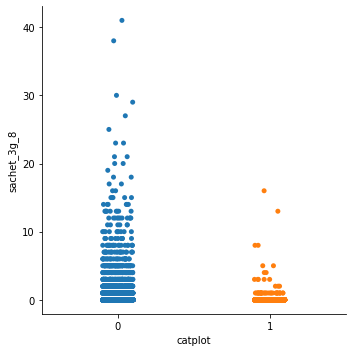

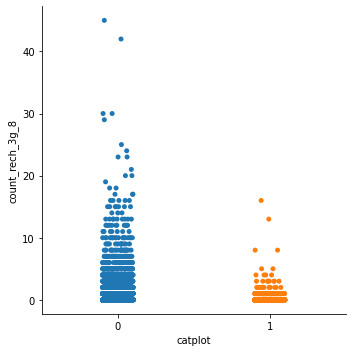

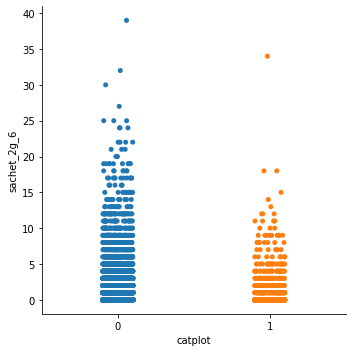

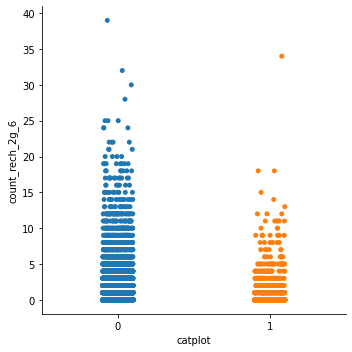

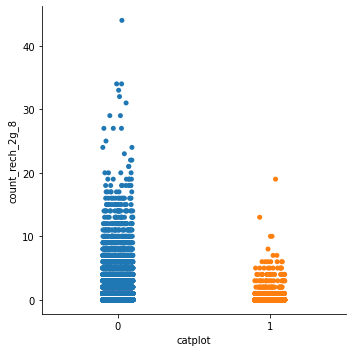

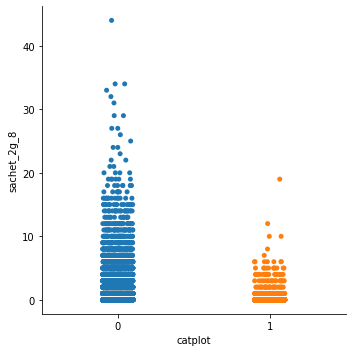

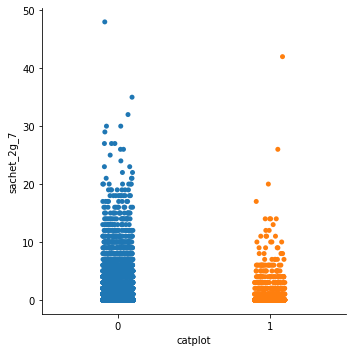

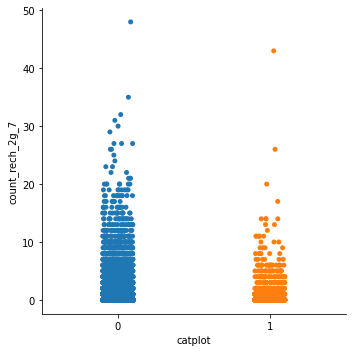

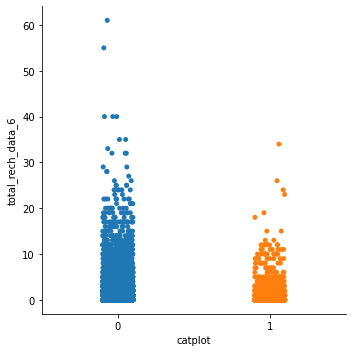

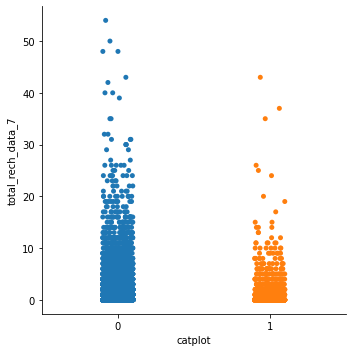

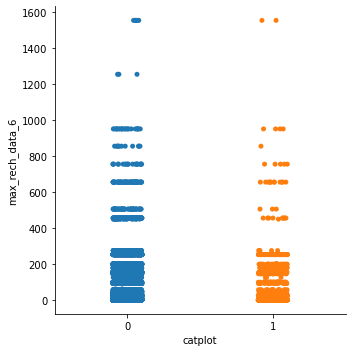

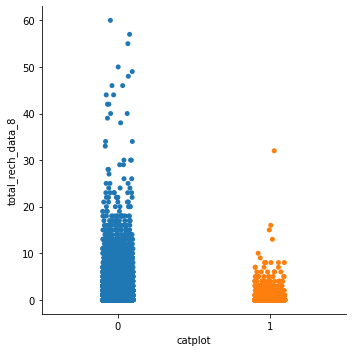

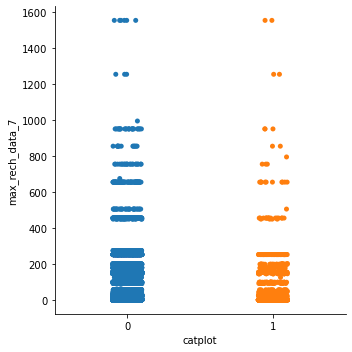

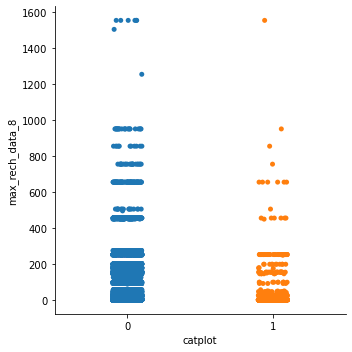

In [57]:
# Check all unique values in cols
unique_val_cols = get_unique_values_in_cols(data_hvc)
# Randomily picking columns having unique values between 10 and 30 for univariate analysis
random_bivariate_cols = unique_val_cols[(unique_val_cols.unique_cnt >10) & (unique_val_cols.unique_cnt <=30)].col_name

random_bivariate_cols = [col for col in random_univariate_cols if col not in all_9_cols]


for col in random_bivariate_cols:
    bivariatePlots(data_hvc,col, 'catplot')

- looking at above categorical plot on random features, it is evident that for churn customers, many features values like monthly_3g, sachet_3g, total_rech_data etc. are more concentrated at the both of the plots and could be good indicator for models

In [58]:
# churn data percentage in high value customers
round(100*data_hvc['churn'].sum()/len(data_hvc),2)

8.64

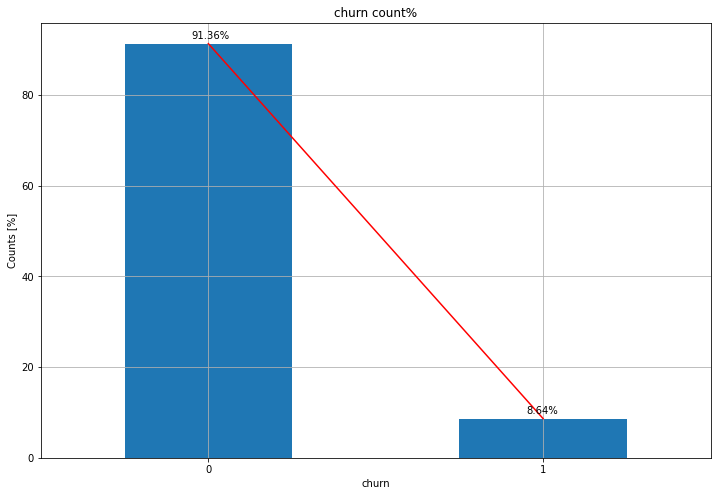

In [59]:
# Let's view the churn data
univariate(df = data_hvc
          ,col = 'churn'
          ,title = "churn count%"
          ,xlabel = "churn"
          ,vartype = 0
          ,rot = 0)

### There is a high level of class imbalance which needs to be treated

In [60]:
data_hvc.shape

(29979, 203)

In [61]:
all_9_cols

['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'last_day_rch_amt_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9',
 'fb_user_9',
 'vbc_3g_9']

In [62]:
# dropping all 9 month columns
data_hvc.drop(all_9_cols,axis=1,inplace=True)

In [63]:
# dropping mobile number
data_hvc.drop(['mobile_number'],axis=1,inplace=True)

In [64]:
data_hvc.shape

(29979, 152)

In [65]:
# checkign if any 9th month columns exist
chk_9_cols = [col for col in data_hvc.columns if '_9' in col]
chk_9_cols

[]

- no 9 month column exist in hvc dataset

In [66]:
data_hvc, cols_skewness = col_capping_and_check_skewness(data_hvc)
cols_skewness

column  before_capping_skew  post_capping_skew
0                    arpu_6            13.344432           1.660489
0                    arpu_7            19.344429           1.712034
0                    arpu_8            16.086110           1.443607
0               onnet_mou_6             3.904336           2.451281
0               onnet_mou_7             4.118698           2.436123
0               onnet_mou_8             4.798194           2.688895
0              offnet_mou_6             3.465289           2.185518
0              offnet_mou_7             3.714513           2.209525
0              offnet_mou_8             4.993941           2.184638
0             roam_ic_mou_6            11.562719           4.776230
0             roam_ic_mou_7            16.889585           5.230590
0             roam_ic_mou_8            18.421106           5.242349
0             roam_og_mou_6             8.970096           4.444193
0             roam_og_mou_7             8.968175           4.783466
0             roam_og_mou_8            14.036046           4.847498
0          loc_og_t2t_mou_6             9.092208           3.970618
0          loc_og_t2t_mou_7            10.200801           3.953222
0          loc_og_t2t_mou_8            13.378011           3.828749
0          loc_og_t2m_mou_6             4.199609           2.190476
0          loc_og_t2m_mou_7             3.963604           2.134186
0          loc_og_t2m_mou_8             3.920898           2.194413
0          loc_og_t2f_mou_6            16.900925           3.749070
0          loc_og_t2f_mou_7            15.477118           3.712116
0          loc_og_t2f_mou_8            11.697789           3.803535
0          loc_og_t2c_mou_6            17.784396           4.075190
0          loc_og_t2c_mou_7            25.213176           4.045876
0          loc_og_t2c_mou_8            16.345337           4.231879
0              loc_og_mou_6             4.386563           2.258814
0              loc_og_mou_7             4.361782           2.212584
0              loc_og_mou_8             5.182396           2.213224
0          std_og_t2t_mou_6             4.358229           2.726259
0          std_og_t2t_mou_7             4.412522           2.655418
0          std_og_t2t_mou_8             4.883215           3.024589
0          std_og_t2m_mou_6             4.448459           2.849553
0          std_og_t2m_mou_7             4.652985           2.872292
0          std_og_t2m_mou_8             6.901244           3.066962
0          std_og_t2f_mou_6            16.516813           5.471527
0          std_og_t2f_mou_7            17.102508           5.578825
0          std_og_t2f_mou_8            16.802989           5.547514
0              std_og_mou_6             2.944619           2.018003
0              std_og_mou_7             3.085512           2.011026
0              std_og_mou_8             3.919849           2.280177
0              isd_og_mou_6            86.867937           7.350508
0              isd_og_mou_7            83.469192           7.218640
0              isd_og_mou_8            88.993169           7.650619
0              spl_og_mou_6            16.103366           3.548547
0              spl_og_mou_7            17.770458           3.337588
0              spl_og_mou_8            18.831050           3.330905
0               og_others_6            11.208855           3.364288
0               og_others_7           105.623284           0.000000
0               og_others_8            99.650870           0.000000
0            total_og_mou_6             2.666010           1.755245
0            total_og_mou_7             2.788802           1.752458
0            total_og_mou_8             3.320621           1.849787
0          loc_ic_t2t_mou_6            11.421233           3.359683
0          loc_ic_t2t_mou_7            11.655258           3.478793
0          loc_ic_t2t_mou_8            10.273946           3.448708
0          loc_ic_t2m_mou_6             4.972855           2.357451
0        

In [67]:
cols_skewness = cols_skewness.sort_values(by='before_capping_skew', ascending=False)
cols_skewness

column  before_capping_skew  post_capping_skew
0               og_others_7           105.623284           0.000000
0               og_others_8            99.650870           0.000000
0              isd_og_mou_8            88.993169           7.650619
0              isd_og_mou_6            86.867937           7.350508
0              isd_og_mou_7            83.469192           7.218640
0              spl_ic_mou_7            72.352980           5.621452
0               ic_others_6            58.590112           5.618246
0               ic_others_7            47.891269           5.427223
0               ic_others_8            46.732003           5.547913
0              spl_ic_mou_6            37.533594           2.485109
0          std_ic_t2f_mou_8            34.208782           5.143837
0          std_ic_t2t_mou_7            29.976142           4.380223
0          std_ic_t2f_mou_6            29.517601           5.152827
0          std_ic_t2f_mou_7            27.841825           5.225387
0          std_ic_t2t_mou_6            25.370718           4.310965
0          loc_og_t2c_mou_7            25.213176           4.045876
0          std_ic_t2t_mou_8            23.115162           4.452114
0              isd_ic_mou_7            21.731666           5.240692
0               avg_amt_6_7            21.226967           2.073074
0              isd_ic_mou_8            19.916227           5.576107
0                    arpu_7            19.344429           1.712034
0              spl_og_mou_8            18.831050           3.330905
0          total_rech_amt_8            18.598755           1.370010
0             roam_ic_mou_8            18.421106           5.242349
0              isd_ic_mou_6            17.787891           5.499810
0          loc_og_t2c_mou_6            17.784396           4.075190
0              spl_og_mou_7            17.770458           3.337588
0          std_og_t2f_mou_7            17.102508           5.578825
0          std_ic_t2m_mou_8            16.964834           4.001260
0          loc_og_t2f_mou_6            16.900925           3.749070
0             roam_ic_mou_7            16.889585           5.230590
0          std_og_t2f_mou_8            16.802989           5.547514
0          std_og_t2f_mou_6            16.516813           5.471527
0          loc_og_t2c_mou_8            16.345337           4.231879
0              spl_og_mou_6            16.103366           3.548547
0                    arpu_8            16.086110           1.443607
0               sachet_3g_8            15.940778           5.326953
0          loc_og_t2f_mou_7            15.477118           3.712116
0               sachet_3g_6            14.676081           5.036613
0               sachet_3g_7            14.391656           5.005458
0             roam_og_mou_8            14.036046           4.847498
0          std_ic_t2m_mou_6            13.720084           4.013053
0          loc_og_t2t_mou_8            13.378011           3.828749
0                    arpu_6            13.344432           1.660489
0              std_ic_mou_7            13.084583           3.940930
0              std_ic_mou_8            12.622503           3.908300
0               vol_3g_mb_6            12.395325           3.428293
0          std_ic_t2m_mou_7            12.089768           4.056866
0              std_ic_mou_6            11.751859           3.831824
0          loc_og_t2f_mou_8            11.697789           3.803535
0          loc_ic_t2t_mou_7            11.655258           3.478793
0             roam_ic_mou_6            11.562719           4.776230
0          loc_ic_t2t_mou_6            11.421233           3.359683
0           count_rech_3g_8            11.349252           3.769165
0               og_others_6            11.208855           3.364288
0          loc_ic_t2f_mou_7            11.116362           3.747811
0          loc_ic_t2f_mou_8            10.779262           3.772803
0          loc_ic_t2f_mou_6            10.465197           3.767615
0        

column  before_capping_skew  post_capping_skew
0   og_others_7           105.623284           0.000000
0   og_others_8            99.650870           0.000000
0  isd_og_mou_8            88.993169           7.650619
0  isd_og_mou_6            86.867937           7.350508
0  isd_og_mou_7            83.469192           7.218640
0  spl_ic_mou_7            72.352980           5.621452
0   ic_others_6            58.590112           5.618246
0   ic_others_7            47.891269           5.427223
0   ic_others_8            46.732003           5.547913

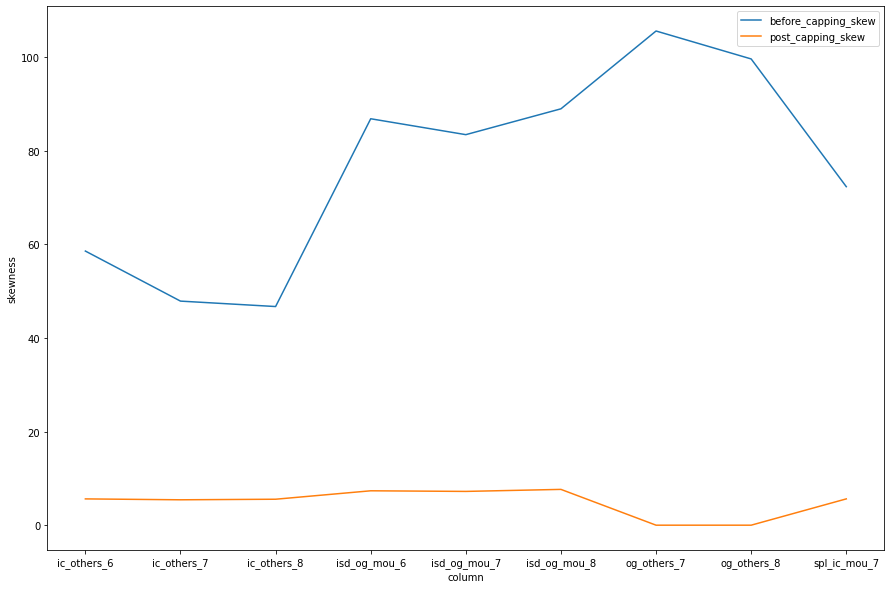

In [68]:
filtered_cols_skewness = cols_skewness[cols_skewness.before_capping_skew >40]
plt.figure(figsize=(15,10))
sns.lineplot(x='column', y='before_capping_skew', data=filtered_cols_skewness, legend='brief', label='before_capping_skew')
ax = sns.lineplot(x='column', y='post_capping_skew', data=filtered_cols_skewness, legend='brief', label='post_capping_skew')

ax.set_ylabel('skewness')

filtered_cols_skewness

In [69]:
data_hvc.shape

(29979, 152)

## Modeling

### Interpretable Model - Logistic Regression (without PCA)

In [70]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import precision_recall_curve

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [71]:
# Create train and test data
df_train, df_test = train_test_split(data_hvc, train_size=0.7, test_size=0.3, random_state=100)

In [72]:
# Create X and y
y_train = df_train.pop('churn')
X_train = df_train

y_test = df_test.pop('churn')
X_test = df_test

In [73]:
# Scale data
scaler_col = X_train.columns
scaler = StandardScaler()
X_train[scaler_col] = scaler.fit_transform(X_train)
X_test[scaler_col] = scaler.transform(X_test)

In [74]:
X_train.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
88105 -1.672586  0.214683  1.234754    -0.710210    -0.578769    -0.515354   
34588 -0.702476 -0.191077 -0.984571    -0.596515    -0.614499    -0.605172   
16623  0.951901 -0.244942 -0.022190    -0.507080    -0.641107    -0.618296   
54904 -0.403458  0.314492  1.334166    -0.208156    -0.474573    -0.501630   
33555 -0.319268 -0.800224 -0.200515    -0.699792    -0.671587    -0.565050   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
88105     -0.974554      2.103560      4.538592      -0.292398      -0.261707   
34588     -0.749998     -0.740149     -0.669415      -0.292398      -0.261707   
16623      0.097739      0.140920     -0.361906      -0.292398      -0.261707   
54904     -0.368432      1.951735      4.538592      -0.292398      -0.261707   
33555      1.708346      0.687953      1.750940      -0.272442      -0.261707   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
88105      -0.261119      -0.310106      -0.283478      -0.279165   
34588      -0.261119      -0.310106      -0.283478      -0.279165   
16623      -0.261119      -0.310106      -0.283478      -0.279165   
54904      -0.261119      -0.310106      -0.283478      -0.279165   
33555      -0.261119      -0.288148      -0.283478      -0.279165   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
88105         -0.536339         -0.303435         -0.285147         -0.821264   
34588         -0.341551         -0.323252         -0.440578         -0.400039   
16623         -0.030159         -0.379630         -0.459614          1.046240   
54904          0.221950         -0.241977         -0.257827          0.201544   
33555         -0.510196         -0.527819         -0.530893         -0.779941   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
88105         -0.763927         -0.610673         -0.431122         -0.434083   
34588         -0.404951         -0.348430         -0.101093         -0.054605   
16623          1.160993          0.200012          1.766069          1.965394   
54904         -0.218966         -0.514853         -0.290375         -0.434083   
33555         -0.746394         -0.704601         -0.431122         -0.434083   

       loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
88105         -0.423839         -0.336272          0.796866         -0.278634   
34588         -0.252634         -0.336272         -0.344281         -0.335063   
16623          0.293626         -0.336272         -0.344281         -0.335063   
54904         -0.403526         -0.336272         -0.315752         -0.335063   
33555         -0.423839         -0.336272         -0.344281         -0.335063   

       loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
88105     -0.836543     -0.687314     -0.571961         -0.511887   
34588     -0.452949     -0.446916     -0.464758         -0.470724   
16623      0.719421      0.633142     -0.090421         -0.510267   
54904      0.206830     -0.303179     -0.495633         -0.283651   
33555     -0.796859     -0.786891     -0.747520         -0.511887   

       std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
88105         -0.478767         -0.423697         -0.545940          2.897797   
34588         -0.510685         -0.461452         -0.545940         -0.543597   
16623         -0.516628         -0.468472         -0.545940         -0.535402   
54904         -0.387181         -0.419417         -0.452684          2.430663   
33555         -0.487614         -0.377981          2.575729          1.288393   

       std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
88105          5.139919         -0.246882         -0.243394         -0.240085   
34588         -0.506096         -0.246882         -0.243394         -0.240085   
16623         -0.506718         

In [75]:
X_test.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
76438  0.942987  0.648751  1.318405     2.162520     2.344372     1.790755   
72869 -0.068084 -0.205477  0.055752    -0.236427    -0.372680    -0.267575   
86053 -0.803327 -0.687857 -0.974627    -0.631756    -0.531137    -0.544877   
29093 -0.917036 -0.514357 -0.421724    -0.668806    -0.673487    -0.599097   
96385  0.144521  0.596711  2.230727     0.626449     0.701716     2.000437   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
76438      0.785931      0.896179      1.120185      -0.292398      -0.261707   
72869     -0.163825      0.120444      0.528135       0.594598      -0.261707   
86053     -0.364760     -0.514495     -0.669784      -0.292398      -0.261707   
29093     -0.362083     -0.334517     -0.343414      -0.292398      -0.261707   
96385     -0.579697     -0.695451      0.211970       1.100871       2.538512   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
76438      -0.261119      -0.310106      -0.283478      -0.279165   
72869      -0.261119       0.261290      -0.283478      -0.279165   
86053      -0.261119      -0.310106      -0.283478      -0.279165   
29093      -0.261119      -0.310106      -0.283478      -0.279165   
96385       6.884887       6.147901       6.512379       6.635355   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
76438          6.070983          6.104590          6.010237          2.455549   
72869          0.503822          0.328955          0.501048          0.645887   
86053         -0.344190         -0.104951         -0.258511          0.380077   
29093         -0.516946         -0.509005         -0.484811          0.265891   
96385         -0.536339         -0.545128         -0.539384         -0.821264   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
76438          2.736971          3.000023         -0.431122         -0.434083   
72869          1.324047          2.011082         -0.101093          0.037867   
86053          0.076279         -0.410354         -0.431122         -0.434083   
29093          0.173834          0.114182         -0.056026          0.742709   
96385         -0.843662         -0.793875         -0.431122         -0.434083   

       loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
76438         -0.037176         -0.336272         -0.344281         -0.335063   
72869         -0.209107         -0.336272         -0.344281         -0.332806   
86053          0.671583         -0.336272         -0.344281         -0.335063   
29093          0.480066         -0.336272         -0.344281         -0.301206   
96385         -0.423839         -0.336272          0.226292         -0.335063   

       loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
76438      4.646170      4.604844      4.556006         -0.511887   
72869      0.642235      1.002145      1.519529         -0.511887   
86053      0.036663     -0.043770     -0.380425         -0.509764   
29093     -0.106249     -0.126973     -0.150201         -0.473461   
96385     -0.836543     -0.858620     -0.809936         -0.511887   

       std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
76438         -0.516628         -0.468472         -0.426719         -0.424440   
72869         -0.516628         -0.468472         -0.545940         -0.526783   
86053         -0.509959         -0.468472         -0.544104         -0.538850   
29093         -0.497805         -0.436054         -0.488111         -0.433430   
96385         -0.516628         -0.417733         -0.545940         -0.543597   

       std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
76438         -0.413959         -0.246882         -0.243394          0.366702   
72869         -0.506718         -0.246882         -0.243394         -0.240085   
86053         -0.506718         

In [76]:
X_train.shape

(20985, 151)

In [77]:
X_test.shape

(8994, 151)

In [78]:
# Balance target class imbalance

# SMOTE - we got 60% sensitivity/recall whereas with RandomUnderSampler, we are getting much better results

# perform SMOTE
# sm = SMOTE(random_state=42, sampling_strategy=1.0)
# X_train, y_train = sm.fit_sample(X_train, y_train)

rm = RandomUnderSampler(random_state=42, sampling_strategy=1.0)
X_train, y_train = rm.fit_sample(X_train, y_train)

In [79]:
X_train.shape

(3548, 151)

In [80]:
# RFE
lm  = LogisticRegression()
rfe = RFE(lm,35)
rfe.fit(X_train,y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=35)

In [81]:
rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)),columns=['col','rfe_support','rfe_ranking'])

In [82]:
rfe_scores[rfe_scores['rfe_support'] == True]

col  rfe_support  rfe_ranking
2                      arpu_8         True            1
3                 onnet_mou_6         True            1
5                 onnet_mou_8         True            1
6                offnet_mou_6         True            1
8                offnet_mou_8         True            1
14              roam_og_mou_8         True            1
16           loc_og_t2t_mou_7         True            1
18           loc_og_t2m_mou_6         True            1
19           loc_og_t2m_mou_7         True            1
27               loc_og_mou_6         True            1
28               loc_og_mou_7         True            1
29               loc_og_mou_8         True            1
31           std_og_t2t_mou_7         True            1
34           std_og_t2m_mou_7         True            1
35           std_og_t2m_mou_8         True            1
39               std_og_mou_6         True            1
41               std_og_mou_8         True            1
52             total_og_mou_7         True            1
57           loc_ic_t2m_mou_6         True            1
64               loc_ic_mou_7         True            1
65               loc_ic_mou_8         True            1
83               spl_ic_mou_8         True            1
93           total_rech_amt_8         True            1
95             max_rech_amt_7         True            1
99         last_day_rch_amt_8         True            1
100         total_rech_data_6         True            1
102         total_rech_data_8         True            1
105           max_rech_data_8         True            1
112        av_rech_amt_data_6         True            1
118               vol_3g_mb_6         True            1
120               vol_3g_mb_8         True            1
123                 arpu_3g_8         True            1
125                 arpu_2g_7         True            1
145                       aon         True            1
149  srvc_not_used_since_days         True            1

In [83]:
col = X_train.columns[rfe.support_]

In [84]:
# Modify the X_train and X_test
X_train_rfe = X_train[col]
X_test_rfe = X_test[col]

In [85]:
X_train_rfe.shape

(3548, 35)

In [86]:
X_test_rfe.shape

(8994, 35)

In [87]:
X_train_rfe_sm = sm.add_constant(X_train_rfe)

### course tuning using p-values and vif

In [88]:
X_train_rfe_sm.head()

const    arpu_8  onnet_mou_6  onnet_mou_8  offnet_mou_6  offnet_mou_8  \
0    1.0  1.253267    -0.583920    -0.576349      0.857292      1.261631   
1    1.0  1.714332    -0.400648    -0.321995      0.355440      2.000660   
2    1.0  0.225335     0.154011    -0.010396      1.882366      1.103955   
3    1.0  3.477462    -0.676388     0.345574     -0.349123      4.538592   
4    1.0 -0.104004    -0.569369    -0.505355     -0.315717     -0.240501   

   roam_og_mou_8  loc_og_t2t_mou_7  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0      -0.279165         -0.412617          0.687771          0.854283   
1      -0.279165          0.094098         -0.489562         -0.483874   
2      -0.279165         -0.131917         -0.034924         -0.153897   
3      -0.279165         -0.460404         -0.758180         -0.599822   
4      -0.279165         -0.059861          0.476854         -0.001259   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_7  \
0      0.300659      0.316890      0.471672         -0.510766   
1     -0.243007     -0.308978      0.073798         -0.490841   
2     -0.259802     -0.206517     -0.116150         -0.055630   
3     -0.785066     -0.658412     -0.245556          0.303671   
4      0.127188     -0.030652      0.205300         -0.492481   

   std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_mou_6  std_og_mou_8  \
0          0.910236          0.966397      0.111225      0.279814   
1          2.008985          2.525160      0.184189      1.242261   
2          2.015933          1.423079      1.759037      0.906818   
3          5.059543          5.139919     -0.228808      4.496892   
4         -0.543597         -0.506718     -0.666361     -0.623696   

   total_og_mou_7  loc_ic_t2m_mou_6  loc_ic_mou_7  loc_ic_mou_8  spl_ic_mou_8  \
0        0.389553          4.707527      3.401654      3.189304     -0.259295   
1        0.722003         -0.346193     -0.161952      0.330237     -0.259295   
2        1.039545         -0.003276     -0.164686     -0.188343      2.225678   
3        4.153765         -0.761365     -0.316932      0.020106     -0.259295   
4       -0.677961          4.321202      2.173639      4.049510     -0.259295   

   total_rech_amt_8  max_rech_amt_7  last_day_rch_amt_8  total_rech_data_6  \
0          1.050341        0.171289           -0.053743          -0.511763   
1          1.635791       -0.876012           -0.558574          -0.511763   
2          0.257869       -0.275730           -0.531529          -0.511763   
3          3.726048        1.129186            0.973949          -0.511763   
4         -0.194018       -0.556713           -0.053743           0.066834   

   total_rech_data_8  max_rech_data_8  av_rech_amt_data_6  vol_3g_mb_6  \
0          -0.530654        -0.571701           -0.549356     -0.38172   
1          -0.530654        -0.571701           -0.549356     -0.38172   
2          -0.530654        -0.571701           -0.549356     -0.38172   
3          -0.530654        -0.571701           -0.549356     -0.38172   
4           0.012634         0.462716            0.076034     -0.38172   

   vol_3g_mb_8  arpu_3g_8  arpu_2g_7       aon  srvc_not_used_since_days  
0    -0.384199  -0.360069  -0.385190 -0.610454                 -0.690735  
1    -0.384199  -0.360069  -0.385190 -0.604268                 -0.544441  
2    -0.384199  -0.360069  -0.385190 -0.777461                 -0.251854  
3    -0.384199  -0.360069  -0.385190 -0.546538                 -0.690735  
4    -0.384199  -0.360069  -0.203339  1.950318                 -0.690735

In [89]:
# check for p-value and vif for logistic model
log_reg = sm.GLM(y_train,X_train_rfe_sm, family = sm.families.Binomial())
res = log_reg.fit()
print(res.summary())
print(get_vif_summary(X_train_rfe_sm))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                 3548
Model:                            GLM   Df Residuals:                     3512
Model Family:                Binomial   Df Model:                           35
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1424.0
Date:                Mon, 31 Aug 2020   Deviance:                       2848.1
Time:                        22:32:40   Pearson chi2:                 1.11e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [90]:
# drop column
X_train_rfe_sm.drop(['loc_og_mou_7'],axis=1,inplace=True)

# check for p-value and vif for logistic model
log_reg = sm.GLM(y_train,X_train_rfe_sm, family = sm.families.Binomial())
res = log_reg.fit()
print(res.summary())
print(get_vif_summary(X_train_rfe_sm))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                 3548
Model:                            GLM   Df Residuals:                     3513
Model Family:                Binomial   Df Model:                           34
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1424.3
Date:                Mon, 31 Aug 2020   Deviance:                       2848.6
Time:                        22:32:41   Pearson chi2:                 1.11e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [91]:
# drop column
X_train_rfe_sm.drop(['loc_og_mou_8'],axis=1,inplace=True)

# check for p-value and vif for logistic model
log_reg = sm.GLM(y_train,X_train_rfe_sm, family = sm.families.Binomial())
res = log_reg.fit()
print(res.summary())
print(get_vif_summary(X_train_rfe_sm))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                 3548
Model:                            GLM   Df Residuals:                     3514
Model Family:                Binomial   Df Model:                           33
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1424.6
Date:                Mon, 31 Aug 2020   Deviance:                       2849.2
Time:                        22:32:41   Pearson chi2:                 1.12e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [92]:
# drop column
X_train_rfe_sm.drop(['std_og_t2m_mou_8'],axis=1,inplace=True)

# check for p-value and vif for logistic model
log_reg = sm.GLM(y_train,X_train_rfe_sm, family = sm.families.Binomial())
res = log_reg.fit()
print(res.summary())
print(get_vif_summary(X_train_rfe_sm))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                 3548
Model:                            GLM   Df Residuals:                     3515
Model Family:                Binomial   Df Model:                           32
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1425.0
Date:                Mon, 31 Aug 2020   Deviance:                       2850.1
Time:                        22:32:41   Pearson chi2:                 1.16e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [93]:
# drop column
X_train_rfe_sm.drop(['loc_og_t2m_mou_6'],axis=1,inplace=True)

# check for p-value and vif for logistic model
log_reg = sm.GLM(y_train,X_train_rfe_sm, family = sm.families.Binomial())
res = log_reg.fit()
print(res.summary())
print(get_vif_summary(X_train_rfe_sm))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                 3548
Model:                            GLM   Df Residuals:                     3516
Model Family:                Binomial   Df Model:                           31
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1425.7
Date:                Mon, 31 Aug 2020   Deviance:                       2851.5
Time:                        22:32:42   Pearson chi2:                 1.17e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [94]:
# drop column
X_train_rfe_sm.drop(['loc_og_t2t_mou_7'],axis=1,inplace=True)

# check for p-value and vif for logistic model
log_reg = sm.GLM(y_train,X_train_rfe_sm, family = sm.families.Binomial())
res = log_reg.fit()
print(res.summary())
print(get_vif_summary(X_train_rfe_sm))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                 3548
Model:                            GLM   Df Residuals:                     3517
Model Family:                Binomial   Df Model:                           30
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1426.5
Date:                Mon, 31 Aug 2020   Deviance:                       2853.0
Time:                        22:32:42   Pearson chi2:                 1.20e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [95]:
# drop column
X_train_rfe_sm.drop(['total_og_mou_7'],axis=1,inplace=True)

# check for p-value and vif for logistic model
log_reg = sm.GLM(y_train,X_train_rfe_sm, family = sm.families.Binomial())
res = log_reg.fit()
print(res.summary())
print(get_vif_summary(X_train_rfe_sm))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                 3548
Model:                            GLM   Df Residuals:                     3518
Model Family:                Binomial   Df Model:                           29
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1435.9
Date:                Mon, 31 Aug 2020   Deviance:                       2871.8
Time:                        22:32:43   Pearson chi2:                 1.02e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [96]:
# drop column
X_train_rfe_sm.drop(['std_og_t2t_mou_7'],axis=1,inplace=True)

# check for p-value and vif for logistic model
log_reg = sm.GLM(y_train,X_train_rfe_sm, family = sm.families.Binomial())
res = log_reg.fit()
print(res.summary())
print(get_vif_summary(X_train_rfe_sm))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                 3548
Model:                            GLM   Df Residuals:                     3519
Model Family:                Binomial   Df Model:                           28
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1436.2
Date:                Mon, 31 Aug 2020   Deviance:                       2872.3
Time:                        22:32:43   Pearson chi2:                 1.03e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [97]:
# drop column
X_train_rfe_sm.drop(['loc_og_t2m_mou_7'],axis=1,inplace=True)

# check for p-value and vif for logistic model
log_reg = sm.GLM(y_train,X_train_rfe_sm, family = sm.families.Binomial())
res = log_reg.fit()
print(res.summary())
print(get_vif_summary(X_train_rfe_sm))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                 3548
Model:                            GLM   Df Residuals:                     3520
Model Family:                Binomial   Df Model:                           27
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1436.5
Date:                Mon, 31 Aug 2020   Deviance:                       2873.0
Time:                        22:32:43   Pearson chi2:                 1.03e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [98]:
# drop column
X_train_rfe_sm.drop(['arpu_3g_8'],axis=1,inplace=True)

# check for p-value and vif for logistic model
log_reg = sm.GLM(y_train,X_train_rfe_sm, family = sm.families.Binomial())
res = log_reg.fit()
print(res.summary())
print(get_vif_summary(X_train_rfe_sm))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                 3548
Model:                            GLM   Df Residuals:                     3521
Model Family:                Binomial   Df Model:                           26
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1437.7
Date:                Mon, 31 Aug 2020   Deviance:                       2875.5
Time:                        22:32:43   Pearson chi2:                 9.60e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [99]:
# drop column
X_train_rfe_sm.drop(['vol_3g_mb_8'],axis=1,inplace=True)

# check for p-value and vif for logistic model
log_reg = sm.GLM(y_train,X_train_rfe_sm, family = sm.families.Binomial())
res = log_reg.fit()
print(res.summary())
print(get_vif_summary(X_train_rfe_sm))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                 3548
Model:                            GLM   Df Residuals:                     3522
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1439.0
Date:                Mon, 31 Aug 2020   Deviance:                       2878.0
Time:                        22:32:44   Pearson chi2:                 9.08e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [100]:
# drop column
X_train_rfe_sm.drop(['std_og_mou_6'],axis=1,inplace=True)

# check for p-value and vif for logistic model
log_reg = sm.GLM(y_train,X_train_rfe_sm, family = sm.families.Binomial())
res = log_reg.fit()
print(res.summary())
print(get_vif_summary(X_train_rfe_sm))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                 3548
Model:                            GLM   Df Residuals:                     3523
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1451.8
Date:                Mon, 31 Aug 2020   Deviance:                       2903.6
Time:                        22:32:44   Pearson chi2:                 8.62e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [101]:
# drop column
X_train_rfe_sm.drop(['std_og_mou_8'],axis=1,inplace=True)

# check for p-value and vif for logistic model
log_reg = sm.GLM(y_train,X_train_rfe_sm, family = sm.families.Binomial())
res = log_reg.fit()
print(res.summary())
print(get_vif_summary(X_train_rfe_sm))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                 3548
Model:                            GLM   Df Residuals:                     3524
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1451.9
Date:                Mon, 31 Aug 2020   Deviance:                       2903.9
Time:                        22:32:44   Pearson chi2:                 8.73e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [102]:
# drop column
X_train_rfe_sm.drop(['loc_ic_t2m_mou_6'],axis=1,inplace=True)

# check for p-value and vif for logistic model
log_reg = sm.GLM(y_train,X_train_rfe_sm, family = sm.families.Binomial())
res = log_reg.fit()
print(res.summary())
print(get_vif_summary(X_train_rfe_sm))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                 3548
Model:                            GLM   Df Residuals:                     3525
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1453.1
Date:                Mon, 31 Aug 2020   Deviance:                       2906.2
Time:                        22:32:44   Pearson chi2:                 8.91e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [103]:
# drop column
X_train_rfe_sm.drop(['arpu_8'],axis=1,inplace=True)

# check for p-value and vif for logistic model
log_reg = sm.GLM(y_train,X_train_rfe_sm, family = sm.families.Binomial())
res = log_reg.fit()
print(res.summary())
print(get_vif_summary(X_train_rfe_sm))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                 3548
Model:                            GLM   Df Residuals:                     3526
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1457.6
Date:                Mon, 31 Aug 2020   Deviance:                       2915.2
Time:                        22:32:45   Pearson chi2:                 1.05e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [104]:
# drop column
X_train_rfe_sm.drop(['total_rech_amt_8'],axis=1,inplace=True)

# check for p-value and vif for logistic model
log_reg = sm.GLM(y_train,X_train_rfe_sm, family = sm.families.Binomial())
res = log_reg.fit()
print(res.summary())
print(get_vif_summary(X_train_rfe_sm))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                 3548
Model:                            GLM   Df Residuals:                     3527
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1458.9
Date:                Mon, 31 Aug 2020   Deviance:                       2917.7
Time:                        22:32:45   Pearson chi2:                 1.02e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

#### The course tuning is complete and we have removed all high p-value and vif features

In [105]:
X_train_rfe_sm.shape

(3548, 21)

### Now the model looks okay to go ahead with

In [106]:
y_train_pred = res.predict(X_train_rfe_sm).values.reshape(-1)

In [107]:
y_train_pred[:10]

array([0.01712125, 0.09990126, 0.20976883, 0.02445875, 0.00055135,
       0.41894615, 0.07947055, 0.14540288, 0.19708818, 0.08465279])

In [108]:
y_train_pred_final = pd.DataFrame({'churn':y_train.values, 'churn_prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

churn  churn_prob  CustID
0      0    0.017121       0
1      0    0.099901       1
2      0    0.209769       2
3      0    0.024459       3
4      0    0.000551       4

In [109]:
y_train_pred_final['predicted'] = y_train_pred_final.churn_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

churn  churn_prob  CustID  predicted
0      0    0.017121       0          0
1      0    0.099901       1          0
2      0    0.209769       2          0
3      0    0.024459       3          0
4      0    0.000551       4          0

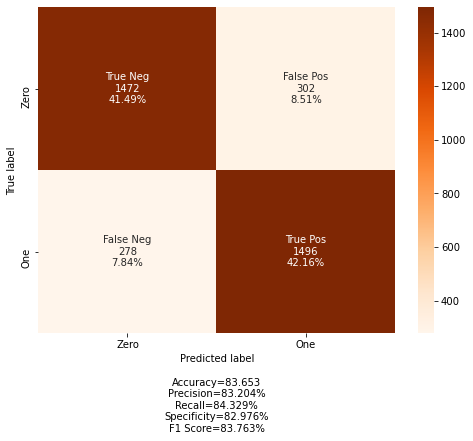

In [110]:
# Confusion matrix on the training data
cm=confusion_matrix(y_train_pred_final.churn, y_train_pred_final.predicted )
    
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']

make_confusion_matrix(cm, 
                  group_names=labels,
                  categories=categories,
                  figsize=(8,6),
                  cmap='Oranges')

### Logistic regression training score

In [111]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.churn, y_train_pred_final.churn_prob, drop_intermediate = False )

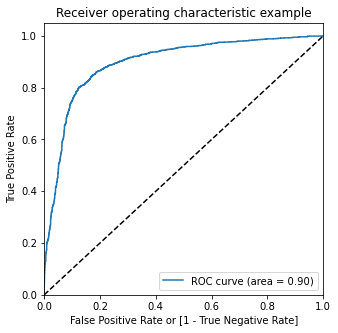

In [112]:
draw_roc(y_train_pred_final.churn, y_train_pred_final.churn_prob)

In [113]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.churn_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

churn  churn_prob  CustID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0      0    0.017121       0          0    1    0    0    0    0    0    0   
1      0    0.099901       1          0    1    0    0    0    0    0    0   
2      0    0.209769       2          0    1    1    1    0    0    0    0   
3      0    0.024459       3          0    1    0    0    0    0    0    0   
4      0    0.000551       4          0    1    0    0    0    0    0    0   

   0.7  0.8  0.9  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    0    0    0

In [114]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.669109  0.975761  0.362458
0.2   0.2  0.745772  0.949831  0.541714
0.3   0.3  0.797914  0.921082  0.674746
0.4   0.4  0.826663  0.887260  0.766065
0.5   0.5  0.836528  0.843292  0.829763
0.6   0.6  0.833991  0.786922  0.881060
0.7   0.7  0.810034  0.707441  0.912627
0.8   0.8  0.740417  0.540023  0.940812
0.9   0.9  0.633596  0.290304  0.976888


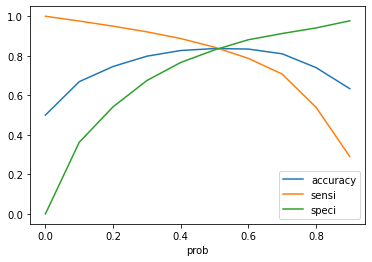

In [115]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### the threshold is very close to 0.5

In [116]:
y_train_pred_final['predicted'] = y_train_pred_final.churn_prob.map( lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

churn  churn_prob  CustID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0      0    0.017121       0          0    1    0    0    0    0    0    0   
1      0    0.099901       1          0    1    0    0    0    0    0    0   
2      0    0.209769       2          0    1    1    1    0    0    0    0   
3      0    0.024459       3          0    1    0    0    0    0    0    0   
4      0    0.000551       4          0    1    0    0    0    0    0    0   

   0.7  0.8  0.9  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    0    0    0

### Note - we already know the stats for 0.5 and hence not running the confusion matrix again

In [117]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.churn, y_train_pred_final.churn_prob)

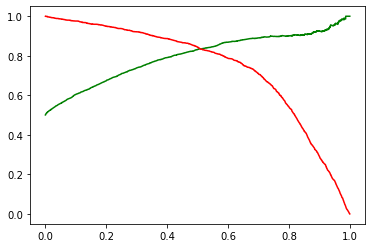

In [118]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [119]:
# extracting the features from train model
final_logreg_cols = X_train_rfe_sm.columns.values.tolist()
final_logreg_cols.remove('const')

# creating test data
X_test_rfe = X_test[final_logreg_cols]
X_test_rfe_sm = sm.add_constant(X_test_rfe)

In [120]:
y_test_pred = res.predict(X_test_rfe_sm).values.reshape(-1)

In [121]:
y_test_pred_final = pd.DataFrame({'churn':y_test.values, 'churn_prob':y_test_pred})
y_test_pred_final['predicted'] = y_test_pred_final.churn_prob.map( lambda x: 1 if x > 0.5 else 0)

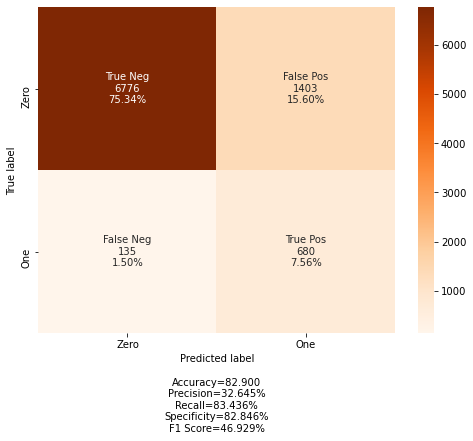

In [122]:
# Confusion matrix on the Test data
cm=confusion_matrix(y_test_pred_final.churn, y_test_pred_final.predicted )
    
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']

make_confusion_matrix(cm, 
                  group_names=labels,
                  categories=categories,
                  figsize=(8,6),
                  cmap='Oranges')

#### Listing all important features for logistic regression

In [123]:
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                 3548
Model:                            GLM   Df Residuals:                     3527
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1458.9
Date:                Mon, 31 Aug 2020   Deviance:                       2917.7
Time:                        22:32:47   Pearson chi2:                 1.02e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

#### Logistic regression (with class_weight = balanced)

In [124]:
X_train_sk = X_train[final_logreg_cols]
X_test_sk = X_test[final_logreg_cols]

In [125]:
X_train_sk.shape

(3548, 20)

In [126]:
X_test_sk.shape

(8994, 20)

In [127]:
sk_log_reg = LogisticRegression(class_weight='balanced', random_state=42)
sk_log_reg.fit(X_train_sk, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

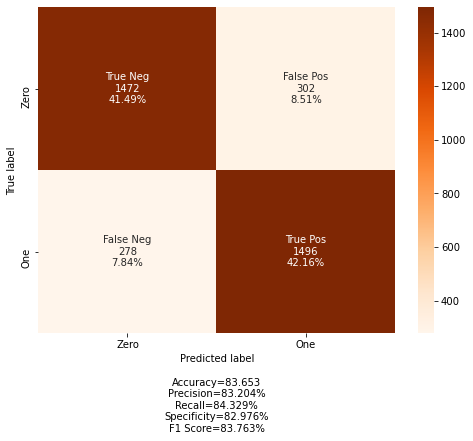

In [128]:
# Confusion matrix on Train data
y_train_pred = sk_log_reg.predict(X_train_sk)
# Confusion matrix on the Test data
cm=confusion_matrix(y_train, y_train_pred )
    
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']

make_confusion_matrix(cm, 
                  group_names=labels,
                  categories=categories,
                  figsize=(8,6),
                  cmap='Oranges')

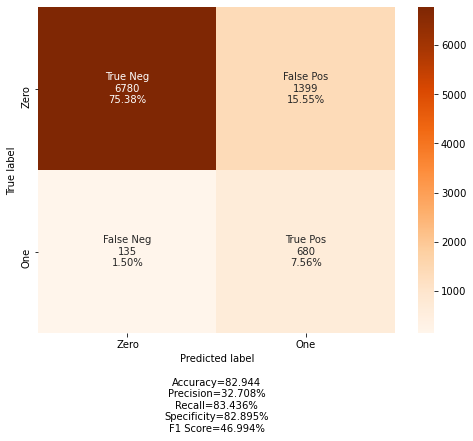

In [129]:
# Confusion matrix on the Test data
y_test_pred = sk_log_reg.predict(X_test_sk)
cm=confusion_matrix(y_test, y_test_pred )
    
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']

make_confusion_matrix(cm, 
                  group_names=labels,
                  categories=categories,
                  figsize=(8,6),
                  cmap='Oranges')

In [130]:
final_log_reg_res = pd.DataFrame(columns=['Features', 'Coefficient Value'])
final_log_reg_res['Features'] = final_logreg_cols
final_log_reg_res['Coefficient Value'] = sk_log_reg.coef_[0]
final_log_reg_res['ABS Coefficient Value'] = final_log_reg_res['Coefficient Value'].apply(lambda x: abs(x))
final_log_reg_res.sort_values(by='ABS Coefficient Value', ascending=False)

Features  Coefficient Value  ABS Coefficient Value
8               loc_ic_mou_8          -1.428067               1.428067
7               loc_ic_mou_7           0.588766               0.588766
3               offnet_mou_8          -0.575603               0.575603
11        last_day_rch_amt_8          -0.517952               0.517952
19  srvc_not_used_since_days           0.512113               0.512113
1                onnet_mou_8          -0.499150               0.499150
14           max_rech_data_8          -0.487586               0.487586
9               spl_ic_mou_8          -0.448105               0.448105
0                onnet_mou_6           0.360789               0.360789
4              roam_og_mou_8           0.354035               0.354035
18                       aon          -0.350250               0.350250
13         total_rech_data_8          -0.347204               0.347204
15        av_rech_amt_data_6          -0.330497               0.330497
16               vol_3g_mb_6           0.265787               0.265787
5               loc_og_mou_6          -0.249275               0.249275
2               offnet_mou_6           0.228812               0.228812
12         total_rech_data_6           0.220085               0.220085
10            max_rech_amt_7           0.205627               0.205627
17                 arpu_2g_7           0.190615               0.190615
6           std_og_t2m_mou_7           0.179348               0.179348

## Analysis and Recommendation based on Logistic Regression Model

### plotting correlation matrix

In [131]:
# Checking correlation of churn with final set of features
corr_cols = final_logreg_cols
corr_cols.append('churn')

In [132]:
corr_mat = data_hvc[corr_cols].corr()
corr_mat

onnet_mou_6  onnet_mou_8  offnet_mou_6  \
onnet_mou_6                  1.000000     0.601187      0.003288   
onnet_mou_8                  0.601187     1.000000     -0.038556   
offnet_mou_6                 0.003288    -0.038556      1.000000   
offnet_mou_8                -0.048834     0.085536      0.547199   
roam_og_mou_8                0.072514     0.053728      0.084014   
loc_og_mou_6                 0.181649     0.080037      0.347673   
std_og_t2m_mou_7            -0.010019     0.045421      0.550155   
loc_ic_mou_7                -0.052466    -0.023821      0.098030   
loc_ic_mou_8                -0.063334     0.019428      0.073311   
spl_ic_mou_8                -0.025690    -0.002028      0.063118   
max_rech_amt_7              -0.074108    -0.027896      0.000954   
last_day_rch_amt_8          -0.048693     0.044625      0.016190   
total_rech_data_6           -0.095460    -0.093349     -0.093687   
total_rech_data_8           -0.088567    -0.041545     -0.076617   
max_rech_data_8             -0.141955    -0.103260     -0.114630   
av_rech_amt_data_6          -0.149236    -0.136474     -0.132186   
vol_3g_mb_6                 -0.120324    -0.105861     -0.105373   
arpu_2g_7                   -0.118198    -0.094922     -0.103213   
aon                         -0.091362    -0.067879     -0.040638   
srvc_not_used_since_days    -0.056026    -0.185863     -0.046956   
churn                        0.077224    -0.110049      0.059453   

                          offnet_mou_8  roam_og_mou_8  loc_og_mou_6  \
onnet_mou_6                  -0.048834       0.072514      0.181649   
onnet_mou_8                   0.085536       0.053728      0.080037   
offnet_mou_6                  0.547199       0.084014      0.347673   
offnet_mou_8                  1.000000       0.086745      0.201059   
roam_og_mou_8                 0.086745       1.000000     -0.031325   
loc_og_mou_6                  0.201059      -0.031325      1.000000   
std_og_t2m_mou_7              0.602927       0.049049     -0.183438   
loc_ic_mou_7                  0.134216      -0.060387      0.465434   
loc_ic_mou_8                  0.203320      -0.102433      0.438567   
spl_ic_mou_8                  0.093634      -0.036763     -0.067698   
max_rech_amt_7                0.066093       0.070527      0.120645   
last_day_rch_amt_8            0.142520       0.041191      0.142788   
total_rech_data_6            -0.090672      -0.025072     -0.017067   
total_rech_data_8            -0.024647      -0.023180     -0.006292   
max_rech_data_8              -0.055806      -0.003037      0.036091   
av_rech_amt_data_6           -0.112665      -0.018463     -0.002249   
vol_3g_mb_6                  -0.089869      -0.009942     -0.013857   
arpu_2g_7                    -0.067167       0.003578     -0.010901   
aon                          -0.007903      -0.008994      0.192528   
srvc_not_used_since_days     -0.210487      -0.047188      0.014109   
churn                        -0.165165       0.094574     -0.086566   

                          std_og_t2m_mou_7  loc_ic_mou_7  loc_ic_mou_8  \
onnet_mou_6                      -0.010019     -0.052466     -0.063334   
onnet_mou_8                       0.045421     -0.023821      0.019428   
offnet_mou_6                      0.550155      0.098030      0.073311   
offnet_mou_8                      0.602927      0.134216      0.203320   
roam_og_mou_8                     0.049049     -0.060387     -0.102433   
loc_og_mou_6                     -0.183438      0.465434      0.438567   
std_og_t2m_mou_7                  1.000000     -0.147601     -0.159650   
loc_ic_mou_7                     -0.147601      1.000000      0.853598   
loc_ic_mou_8                     -0.159650      0.853598      1.000000   
spl_ic_mou_8                      0.127456     -0.051077     -0.035467   
max_rech_amt_7                   -0.070417      0.117349      0.124383   
last_day_rch_amt_8               -0.065744      0.139349      0.175252   
tota

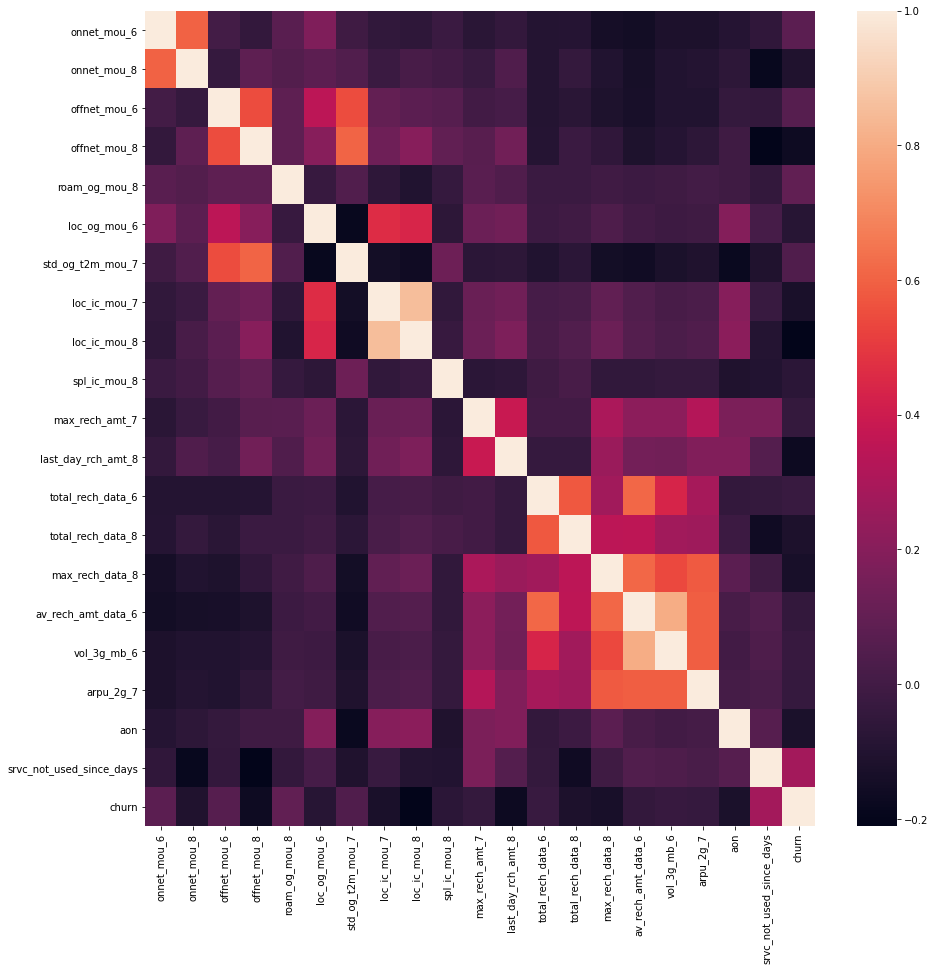

In [133]:
plt.figure(figsize=(15,15))
sns.heatmap(data_hvc[final_logreg_cols].corr())

- We can see the derived feature - svc_not_used_since_days is highly correlated to the churn result

### Plotting Catplot for selected features vs churn

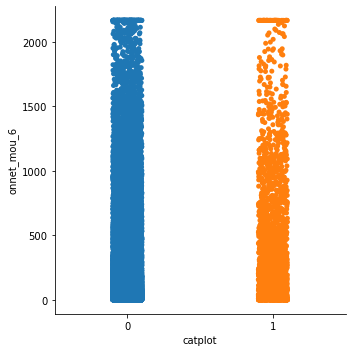

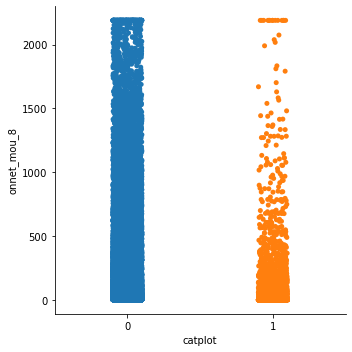

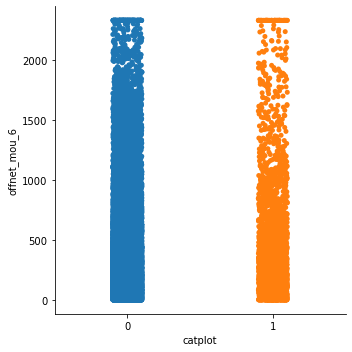

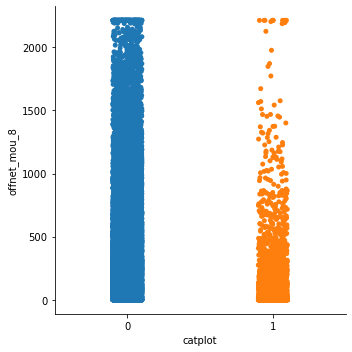

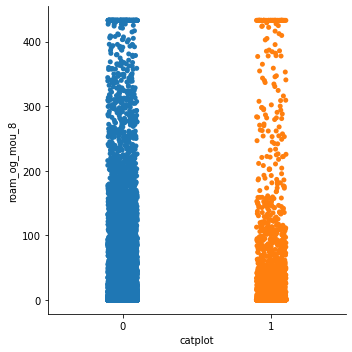

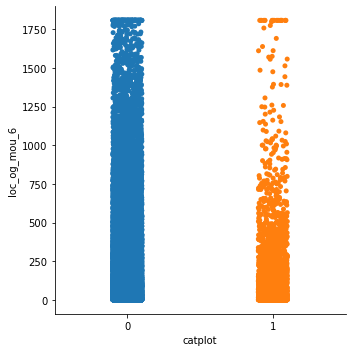

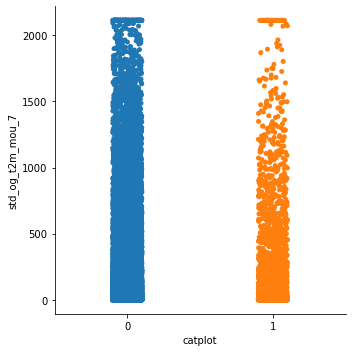

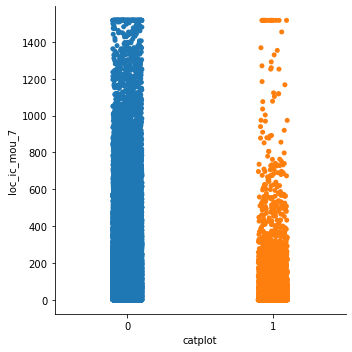

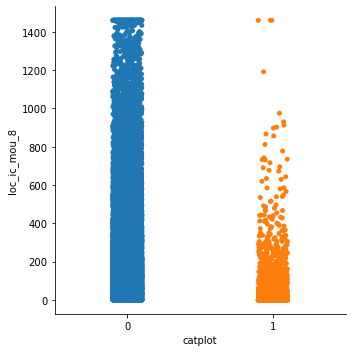

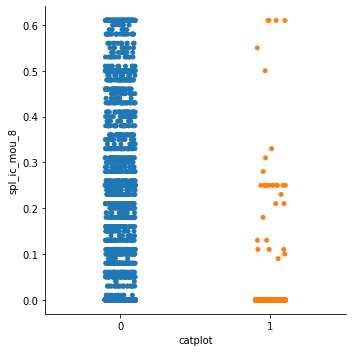

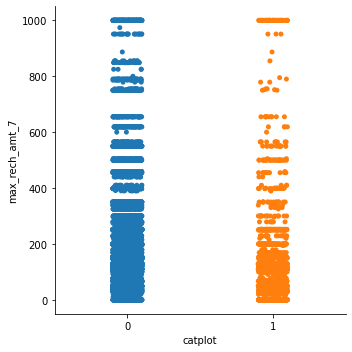

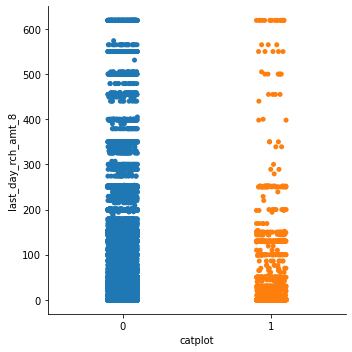

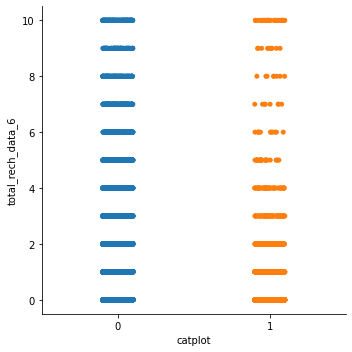

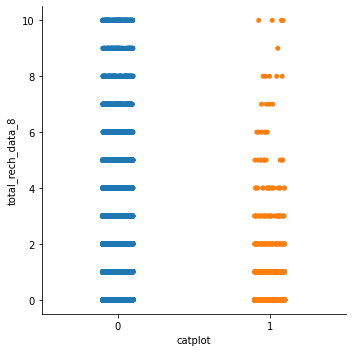

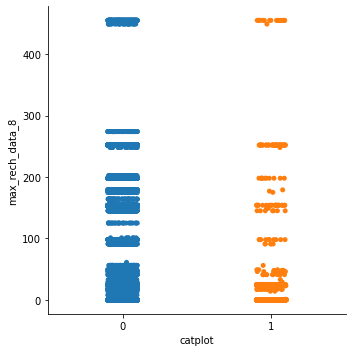

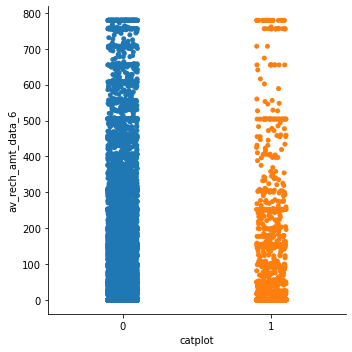

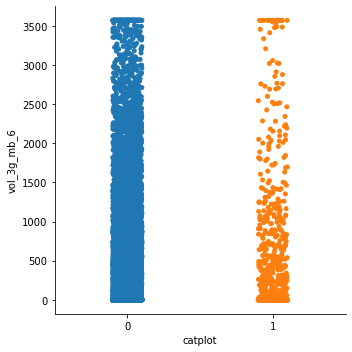

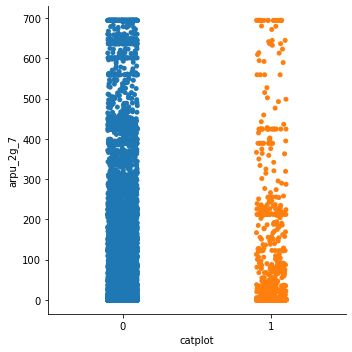

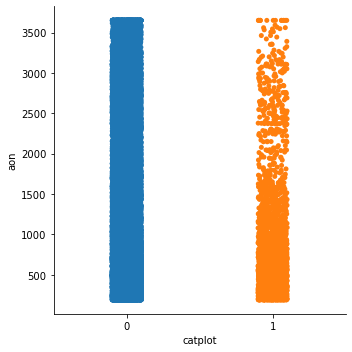

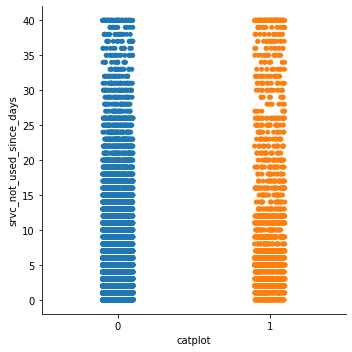

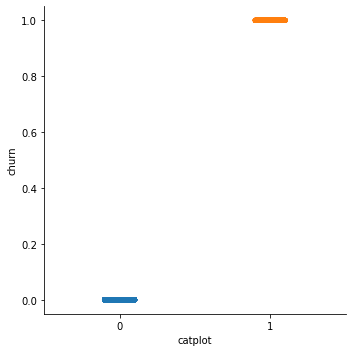

In [134]:
for col in final_logreg_cols:
    bivariatePlots(data_hvc,col, 'catplot')

- Above plot shows that for churn customers, 8th month feature values are more concentrated at lower level while for non churn customer it is densily populated 

### Plotting Coefficient values for final logistic regression model

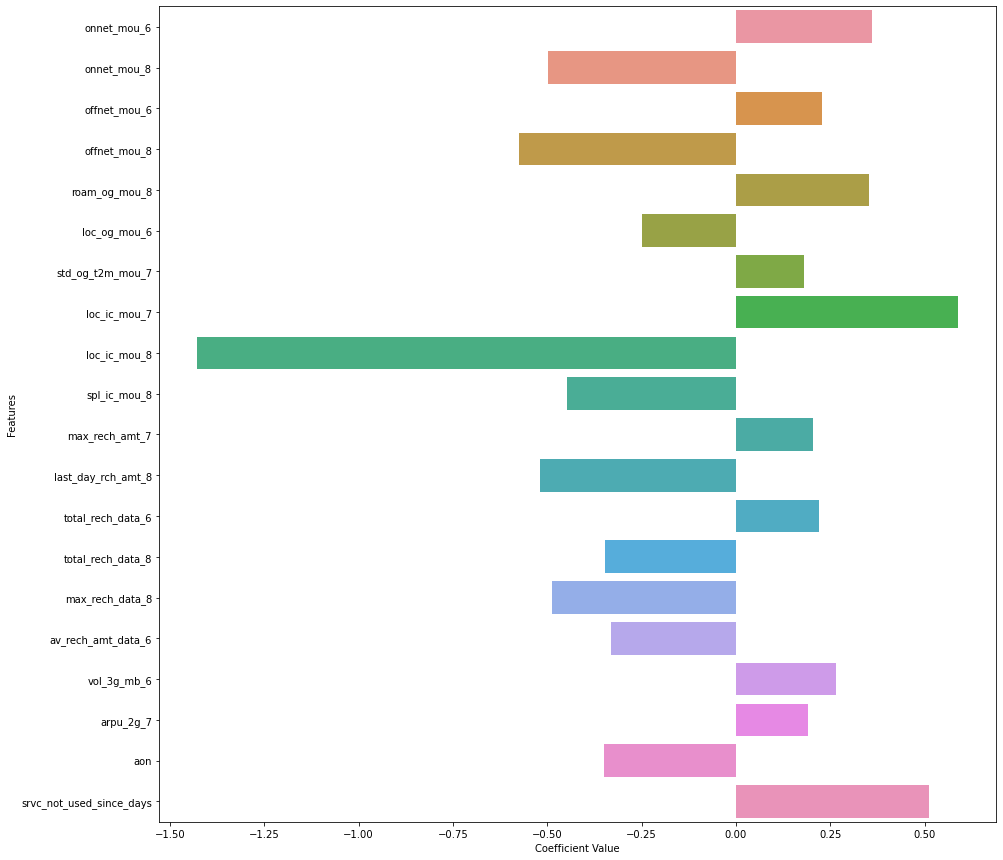

In [135]:
plt.figure(figsize=(15,15))
sns.barplot(x='Coefficient Value', y='Features', data=final_log_reg_res)

- Negative coefficients means, this feature has negative effect on churn.
- Positive coefficints means, feature has positive affect in predective churn if rest features are unchanged.
- The loc_ic_mou_8 has high -ve coeff value. It means people who are using the services for local incoming calls, are less likely to churn

### Looking at the coefficients value of logistics regression model, we can conclude with following points
- many of 8th Month feature('Action Phase') have negative coefficients. We can say that if customer is using service in Active Phase (8th month), it is most likely that he will not churn and vice versa.
  Example: From above coeff table data, features like loc_ic_mou_8 and offnet_mou_8 have coefficients values -1.42 and -0.58 respectively
            Negative coefficients means, this feature has negative effect on churn. loc_ic_mou_8 coefficient is -1.42. It means, if customer using loc telecom service, it is most likely that he will not churn

- Below are the 8th month top features for predicting churn (-ve coeff => low value indicates high chances for churn)

    - loc_ic_mou_8
    - offnet_mou_8
    - last_day_rch_amt_8
    - onnet_mou_8
    - max_rech_data_8
    - spl_ic_mou_8
    - total_rech_data_8
    - av_rech_amt_data_6

- srvc_not_used_since_days is very good indicatore for predicting churn. Coeff is +ve. It means, if the customer has not used the service for long days, he is likely to churn
    
    srvc_not_used_since_days	0.512113

- roam_og_mou_8: Roaming Outgoing Minutes of usage
    It has +ve coeff. If roaming usage are more for customer in 8th month, he is likely to churn





### Use PCA for dimensionality reduction

In [196]:
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

In [197]:
X_train.shape

(3548, 151)

In [198]:
X_test.shape

(8994, 151)

In [199]:
# invoke pca for 95% of variance
pca = PCA(0.95)
X_train_pca = pca.fit_transform(X_train)
pca.explained_variance_ratio_

array([0.12522143, 0.08324111, 0.06765162, 0.05323165, 0.04298697,
       0.04040389, 0.03691442, 0.03378791, 0.02683098, 0.02229591,
       0.01951432, 0.01887946, 0.0181262 , 0.01740595, 0.01570222,
       0.01410224, 0.01382676, 0.01320694, 0.01280755, 0.01242129,
       0.01121963, 0.01041889, 0.01010337, 0.00927091, 0.00897303,
       0.00844631, 0.0081278 , 0.00799039, 0.00770951, 0.0074104 ,
       0.00716247, 0.00695555, 0.00689854, 0.00665278, 0.00654437,
       0.00638691, 0.00628123, 0.00606045, 0.00574192, 0.00556264,
       0.00541744, 0.00522015, 0.00503966, 0.00496722, 0.00489811,
       0.00471937, 0.00447877, 0.00433381, 0.00407025, 0.00396069,
       0.00378275, 0.00375513, 0.00370123, 0.00368949, 0.00349986,
       0.00327126, 0.00324588, 0.00316185, 0.00313576, 0.00297425,
       0.00286878, 0.00273362, 0.00272008, 0.00266976, 0.00260133,
       0.00253716, 0.00251174, 0.00241402, 0.00237453, 0.0023095 ,
       0.00223069])

In [200]:
y_train.value_counts()

1    1774
0    1774
Name: churn, dtype: int64

In [201]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

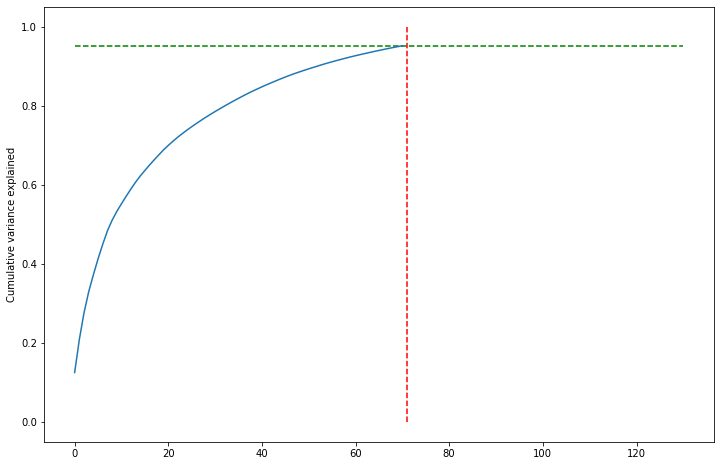

In [205]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=71, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=130, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [206]:
X_train_pca.shape

(3548, 71)

In [207]:
X_test_pca = pca.transform(X_test)
X_test_pca.shape

(8994, 71)

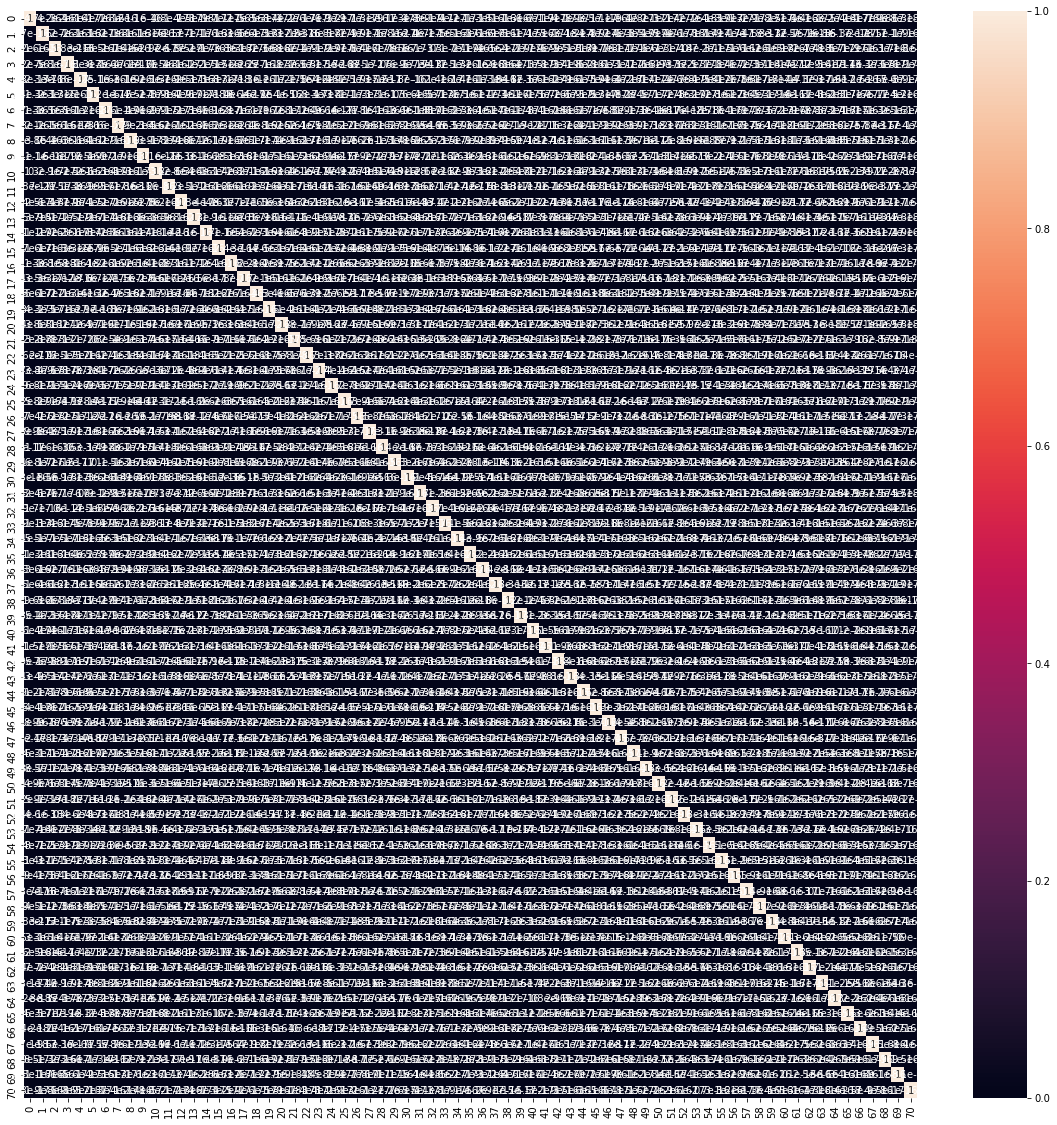

In [208]:
# correlation matrix
corrmat = np.corrcoef(X_train_pca.transpose())
plt.figure(figsize=[20,20])
sns.heatmap(corrmat, annot=True)

### XGBoost (with PCA)

In [210]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import gc

In [211]:
X_train.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  0.525255  0.603675  1.253267    -0.583920    -0.648424    -0.576349   
1 -0.236392  0.393305  1.714332    -0.400648    -0.438843    -0.321995   
2  0.685579  0.516123  0.225335     0.154011    -0.139960    -0.010396   
3 -1.385836  4.030356  3.477462    -0.676388     0.053040     0.345574   
4 -0.007648 -0.447385 -0.104004    -0.569369    -0.498638    -0.505355   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0      0.857292      1.171277      1.261631      -0.292398      -0.261707   
1      0.355440      1.448051      2.000660      -0.056408      -0.261707   
2      1.882366      1.615698      1.103955      -0.292398      -0.261707   
3     -0.349123      4.643212      4.538592      -0.292398      -0.261707   
4     -0.315717     -0.523221     -0.240501      -0.292398      -0.261707   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0      -0.261119      -0.310106      -0.283478      -0.279165   
1      -0.261119      -0.287436      -0.283478      -0.279165   
2      -0.261119      -0.310106      -0.283478      -0.279165   
3      -0.261119      -0.310106      -0.283478      -0.279165   
4      -0.261119      -0.310106      -0.283478      -0.279165   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0         -0.219424         -0.412617         -0.344718          0.687771   
1          0.230112          0.094098          0.351985         -0.489562   
2         -0.400036         -0.131917         -0.084524         -0.034924   
3         -0.514921         -0.460404         -0.317534         -0.758180   
4         -0.292025         -0.059861         -0.172921          0.476854   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0          0.854283          0.978935         -0.361789         -0.262153   
1         -0.483874         -0.076051         -0.431122         -0.434083   
2         -0.153897         -0.056897         -0.431122         -0.434083   
3         -0.599822         -0.089387         -0.431122         -0.434083   
4         -0.001259          0.496442         -0.383975          0.475568   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0          0.260981         -0.336272          2.449334         -0.335063   
1         -0.423839         -0.336272         -0.344281          1.653503   
2         -0.423839         -0.336272         -0.344281          2.371282   
3         -0.423839         -0.336272         -0.344281          0.965066   
4         -0.423839         -0.336272         -0.124830          0.287916   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0      0.300659      0.316890      0.471672         -0.511887   
1     -0.243007     -0.308978      0.073798         -0.507195   
2     -0.259802     -0.206517     -0.116150          0.412896   
3     -0.785066     -0.658412     -0.245556         -0.483040   
4      0.127188     -0.030652      0.205300         -0.462235   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0         -0.510766         -0.468472          0.705583          0.910236   
1         -0.490841         -0.468472          0.813700          2.008985   
2         -0.055630          0.069138          2.331246          2.015933   
3          0.303671          0.572646          0.151162          5.059543   
4         -0.492481         -0.459026         -0.545940         -0.543597   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0          0.966397         -0.246882         -0.243394         -0.240085   
1          2.525160         -0.246882         -0.243394         -0.240085   
2          1.423079         -0.246882         -0.243394         -0.199761   
3          5.139919         -0.246882         -0.243394         -0.240085   
4         -0.506718         -0.246882         -0.243394         -0.240085   



In [212]:
X_test.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
76438  0.942987  0.648751  1.318405     2.162520     2.344372     1.790755   
72869 -0.068084 -0.205477  0.055752    -0.236427    -0.372680    -0.267575   
86053 -0.803327 -0.687857 -0.974627    -0.631756    -0.531137    -0.544877   
29093 -0.917036 -0.514357 -0.421724    -0.668806    -0.673487    -0.599097   
96385  0.144521  0.596711  2.230727     0.626449     0.701716     2.000437   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
76438      0.785931      0.896179      1.120185      -0.292398      -0.261707   
72869     -0.163825      0.120444      0.528135       0.594598      -0.261707   
86053     -0.364760     -0.514495     -0.669784      -0.292398      -0.261707   
29093     -0.362083     -0.334517     -0.343414      -0.292398      -0.261707   
96385     -0.579697     -0.695451      0.211970       1.100871       2.538512   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
76438      -0.261119      -0.310106      -0.283478      -0.279165   
72869      -0.261119       0.261290      -0.283478      -0.279165   
86053      -0.261119      -0.310106      -0.283478      -0.279165   
29093      -0.261119      -0.310106      -0.283478      -0.279165   
96385       6.884887       6.147901       6.512379       6.635355   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
76438          6.070983          6.104590          6.010237          2.455549   
72869          0.503822          0.328955          0.501048          0.645887   
86053         -0.344190         -0.104951         -0.258511          0.380077   
29093         -0.516946         -0.509005         -0.484811          0.265891   
96385         -0.536339         -0.545128         -0.539384         -0.821264   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
76438          2.736971          3.000023         -0.431122         -0.434083   
72869          1.324047          2.011082         -0.101093          0.037867   
86053          0.076279         -0.410354         -0.431122         -0.434083   
29093          0.173834          0.114182         -0.056026          0.742709   
96385         -0.843662         -0.793875         -0.431122         -0.434083   

       loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
76438         -0.037176         -0.336272         -0.344281         -0.335063   
72869         -0.209107         -0.336272         -0.344281         -0.332806   
86053          0.671583         -0.336272         -0.344281         -0.335063   
29093          0.480066         -0.336272         -0.344281         -0.301206   
96385         -0.423839         -0.336272          0.226292         -0.335063   

       loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
76438      4.646170      4.604844      4.556006         -0.511887   
72869      0.642235      1.002145      1.519529         -0.511887   
86053      0.036663     -0.043770     -0.380425         -0.509764   
29093     -0.106249     -0.126973     -0.150201         -0.473461   
96385     -0.836543     -0.858620     -0.809936         -0.511887   

       std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
76438         -0.516628         -0.468472         -0.426719         -0.424440   
72869         -0.516628         -0.468472         -0.545940         -0.526783   
86053         -0.509959         -0.468472         -0.544104         -0.538850   
29093         -0.497805         -0.436054         -0.488111         -0.433430   
96385         -0.516628         -0.417733         -0.545940         -0.543597   

       std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
76438         -0.413959         -0.246882         -0.243394          0.366702   
72869         -0.506718         -0.246882         -0.243394         -0.240085   
86053         -0.506718         

In [215]:
y_train.value_counts()

1    1774
0    1774
Name: churn, dtype: int64

In [216]:
y_test.shape

(8994,)

In [217]:
# fit model on training data with default hyperparameters
xgmodel = XGBClassifier()
xgmodel.fit(X_train_pca, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [218]:
# make predictions for test data
# use predict_proba since we need probabilities to compute auc
y_train_pred_prob = xgmodel.predict_proba(X_train_pca)
y_train_pred_prob[:10]

array([[9.9694192e-01, 3.0580885e-03],
       [9.7609645e-01, 2.3903543e-02],
       [9.9198127e-01, 8.0187386e-03],
       [9.8633659e-01, 1.3663402e-02],
       [9.9969256e-01, 3.0744603e-04],
       [9.8500365e-01, 1.4996374e-02],
       [9.9498641e-01, 5.0136135e-03],
       [9.9163526e-01, 8.3647361e-03],
       [9.8373359e-01, 1.6266407e-02],
       [9.9963462e-01, 3.6539073e-04]], dtype=float32)

In [219]:
# evaluate predictions
roc = metrics.roc_auc_score(y_train, y_train_pred_prob[:, 1])
print("AUC: %.2f%%" % (roc * 100.0))

AUC: 100.00%


In [220]:
# predictions on train score
y_train_pred = xgmodel.predict(X_train_pca)

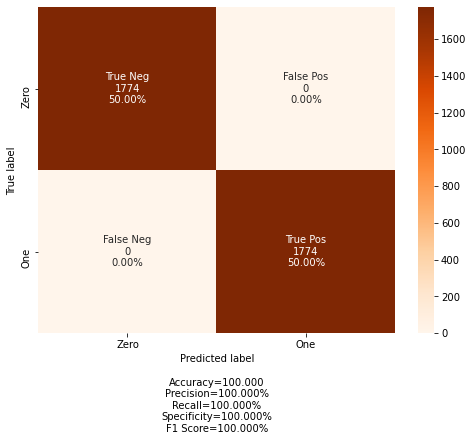

In [221]:
# confusion matrix on the train data
cm=confusion_matrix(y_train, y_train_pred)
    
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']

make_confusion_matrix(cm, 
                  group_names=labels,
                  categories=categories,
                  figsize=(8,6),
                  cmap='Oranges')

In [222]:
# predict test data
y_test_pred = xgmodel.predict(X_test_pca)

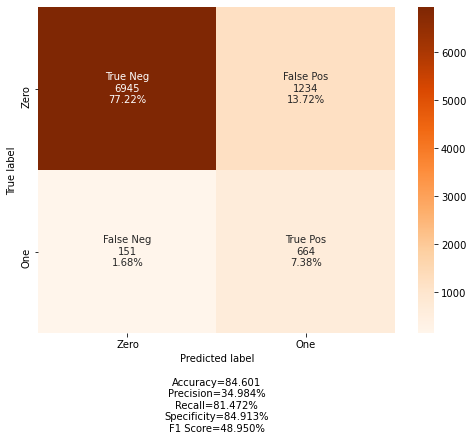

In [223]:
# confusion matrix on the test data
cm=confusion_matrix(y_test, y_test_pred)
    
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']

make_confusion_matrix(cm, 
                  group_names=labels,
                  categories=categories,
                  figsize=(8,6),
                  cmap='Oranges')

#### Hyper parameter tuning

In [258]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {
              'learning_rate': [0.01, 0.1], 
              'subsample': [0.3, 0.6, 0.9],
              'n_estimators':[100,200,400,600],
              'objective':['binary:logistic']
             }          

# specify model
xgb_model = XGBClassifier()

# set up GridSearchCV()
xgboost_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)

In [259]:
# fit the model
xgboost_cv.fit(X_train_pca, y_train) 

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:  8.4min finished


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs...
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, va

In [260]:
xgboost_cv.best_params_

{'learning_rate': 0.01,
 'n_estimators': 600,
 'objective': 'binary:logistic',
 'subsample': 0.6}

In [261]:
xgboost_cv.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=600, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [262]:
cv_results = pd.DataFrame(xgboost_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.258590      0.258756         0.013386        0.000435   
1       1.925487      0.322909         0.014670        0.002043   
2       2.424943      0.312511         0.012659        0.001246   
3       2.630901      0.186340         0.017988        0.002160   
4       4.571942      0.478871         0.034665        0.012988   

  param_learning_rate param_n_estimators  param_objective param_subsample  \
0                0.01                100  binary:logistic             0.3   
1                0.01                100  binary:logistic             0.6   
2                0.01                100  binary:logistic             0.9   
3                0.01                200  binary:logistic             0.3   
4                0.01                200  binary:logistic             0.6   

                                                                                           params  \
0  {'learning_rate': 0.01, 'n_estimators': 100, 'objective': 'binary:logistic', 'subsample': 0.3}   
1  {'learning_rate': 0.01, 'n_estimators': 100, 'objective': 'binary:logistic', 'subsample': 0.6}   
2  {'learning_rate': 0.01, 'n_estimators': 100, 'objective': 'binary:logistic', 'subsample': 0.9}   
3  {'learning_rate': 0.01, 'n_estimators': 200, 'objective': 'binary:logistic', 'subsample': 0.3}   
4  {'learning_rate': 0.01, 'n_estimators': 200, 'objective': 'binary:logistic', 'subsample': 0.6}   

   split0_test_score  split1_test_score  split2_test_score  mean_test_score  \
0           0.881311           0.882497           0.877603         0.880470   
1           0.883117           0.882869           0.882178         0.882721   
2           0.878447           0.879001           0.880635         0.879361   
3           0.886044           0.886178           0.885659         0.885961   
4           0.888353           0.886273           0.888540         0.887722   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.002085               19            0.952510            0.951968   
1        0.000397               18            0.969181            0.969877   
2        0.000929               20            0.974969            0.974397   
3        0.000220                8            0.965482            0.965504   
4        0.001028                7            0.980999            0.980712   

   split2_train_score  mean_train_score  std_train_score  
0            0.950627          0.951701         0.000791  
1            0.967026          0.968695         0.001214  
2            0.972336          0.973901         0.001131  
3            0.964005          0.964997         0.000701  
4            0.980407          0.980706         0.000242

In [263]:
xgboost_cv_best = xgboost_cv.best_estimator_

In [264]:
# fit the training data with the best_estimator_
xgboost_cv_best.fit(X_train_pca, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=600, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [272]:
# predictions on train score
# y_train_pred_ = xgboost_cv_best.predict(X_train_pca)
y_train_pred_prob = xgboost_cv_best.predict_proba(X_train_pca).T[1]
y_train_pred_prob

array([0.03450517, 0.12142048, 0.10968442, ..., 0.940922  , 0.9373473 ,
       0.79567325], dtype=float32)

In [273]:
y_test_pred_final = pd.DataFrame({'churn':y_train.values, 'churn_prob':y_train_pred_prob})
y_train_pred_final['predicted'] = y_train_pred_final.churn_prob.map( lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

churn  churn_prob  CustID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0      0    0.017121       0          0    1    0    0    0    0    0    0   
1      0    0.099901       1          0    1    0    0    0    0    0    0   
2      0    0.209769       2          0    1    1    1    0    0    0    0   
3      0    0.024459       3          0    1    0    0    0    0    0    0   
4      0    0.000551       4          0    1    0    0    0    0    0    0   

   0.7  0.8  0.9  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    0    0    0

In [274]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.669109  0.975761  0.362458
0.2   0.2  0.745772  0.949831  0.541714
0.3   0.3  0.797914  0.921082  0.674746
0.4   0.4  0.826663  0.887260  0.766065
0.5   0.5  0.836528  0.843292  0.829763
0.6   0.6  0.833991  0.786922  0.881060
0.7   0.7  0.810034  0.707441  0.912627
0.8   0.8  0.740417  0.540023  0.940812
0.9   0.9  0.633596  0.290304  0.976888


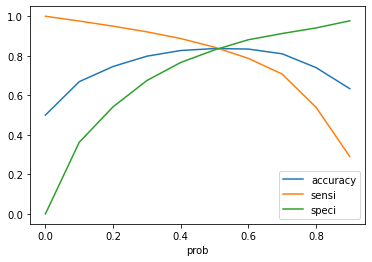

In [275]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

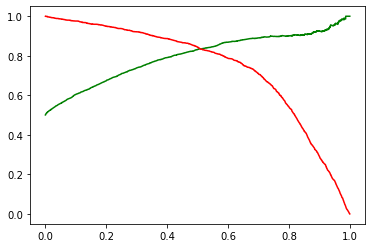

In [276]:
# precision recall curve
p, r, thresholds = precision_recall_curve(y_train_pred_final.churn, y_train_pred_final.churn_prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

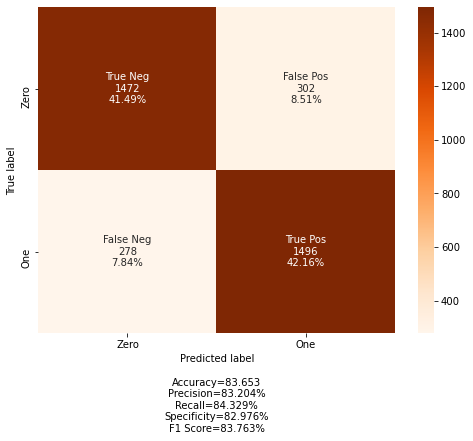

In [277]:
# confusion matrix on the train data
cm=confusion_matrix(y_train, y_train_pred_final['predicted'])
    
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']

make_confusion_matrix(cm, 
                  group_names=labels,
                  categories=categories,
                  figsize=(8,6),
                  cmap='Oranges')

#### We are going ahead with a threshold of 0.5 as this is optimized value based on sensitivity-specificity curve

In [278]:
# predictions on test score
y_test_pred = xgboost_cv_best.predict(X_test_pca)

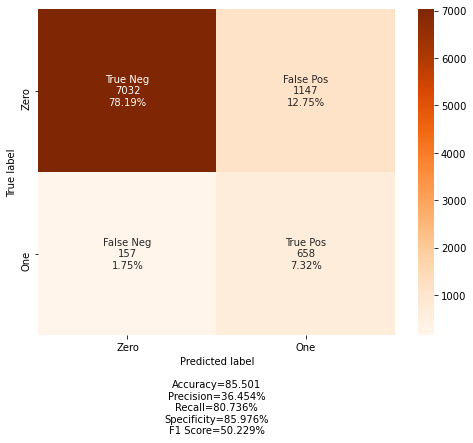

In [279]:
# confusion matrix on the train data
cm=confusion_matrix(y_test, y_test_pred)
    
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']

make_confusion_matrix(cm, 
                  group_names=labels,
                  categories=categories,
                  figsize=(8,6),
                  cmap='Oranges')

### Random Forest (with PCA)

In [280]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

#### Running the random forest with default parameters.

In [281]:
rfc = RandomForestClassifier()

In [282]:
# fit
rfc.fit(X_train_pca,y_train)

RandomForestClassifier()

In [283]:
# predict train data
y_train_pred = rfc.predict(X_train_pca)

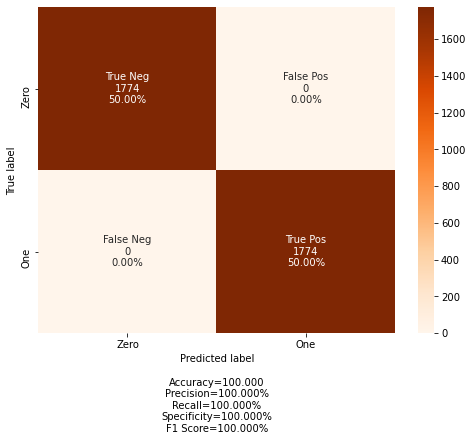

In [284]:
# confusion matrix on the train data
cm=confusion_matrix(y_train, y_train_pred)
    
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']

make_confusion_matrix(cm, 
                  group_names=labels,
                  categories=categories,
                  figsize=(8,6),
                  cmap='Oranges')

In [285]:
# making predictions on test data
y_test_pred = rfc.predict(X_test_pca)

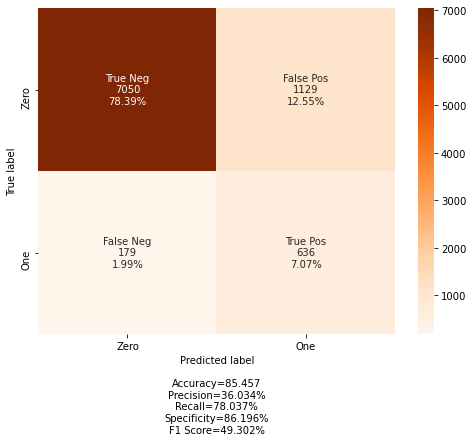

In [286]:
# confusion matrix on the test data
cm=confusion_matrix(y_test, y_test_pred)
    
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']

make_confusion_matrix(cm, 
                  group_names=labels,
                  categories=categories,
                  figsize=(8,6),
                  cmap='Oranges')

#### Hyperparameter tuning

In [287]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 42)

# Look at parameters used by our current forest
from pprint import pprint
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [288]:
# Rafrom sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [289]:
from sklearn.model_selection import RandomizedSearchCV
# Use the random grid to search for best hyperparameters

# First create the base model to tune
rf = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf
                             , param_distributions = random_grid
                             , n_iter = 100
                             , cv = 3
                             , verbose=2
                             , random_state=42
                             , n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train_pca, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 36.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 69.4min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [290]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': False}

In [291]:
rf_random.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=100, min_samples_leaf=4,
                       min_samples_split=5, n_estimators=200)

In [292]:
rf = rf_random.best_estimator_

In [293]:
rf.fit(X_train_pca, y_train)

RandomForestClassifier(bootstrap=False, max_depth=100, min_samples_leaf=4,
                       min_samples_split=5, n_estimators=200)

In [294]:
# Making predictions
y_test_pred = rf.predict(X_test_pca)

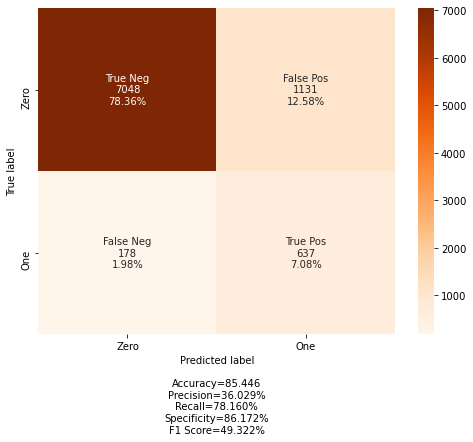

In [295]:
# confusion matrix on the test data
cm=confusion_matrix(y_test, y_test_pred)
    
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']

make_confusion_matrix(cm, 
                  group_names=labels,
                  categories=categories,
                  figsize=(8,6),
                  cmap='Oranges')

### Adaboost Model (with PCA)

In [296]:
from sklearn.ensemble import AdaBoostClassifier

In [297]:
# base estimator: a weak learner with max_depth=2
shallow_tree = DecisionTreeClassifier(max_depth=2,random_state = 100)

In [298]:
# fit the shallow decision tree - base estimator
shallow_tree.fit(X_train_pca, y_train)

# train score
y_train_pred = shallow_tree.predict(X_train_pca)

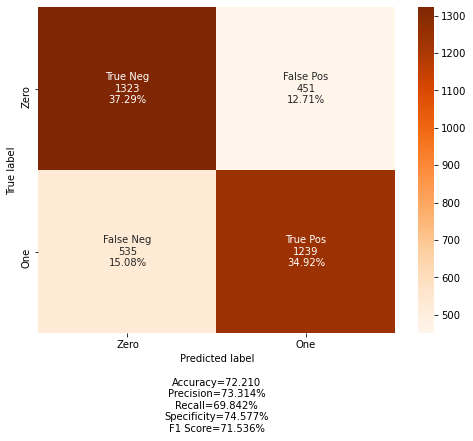

In [299]:
# confusion matrix on the train data - base estimator
cm=confusion_matrix(y_train, y_train_pred)
    
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']

make_confusion_matrix(cm, 
                  group_names=labels,
                  categories=categories,
                  figsize=(8,6),
                  cmap='Oranges')

In [300]:
# predict using base estimator (weak learner)
y_test_pred = shallow_tree.predict(X_test_pca)

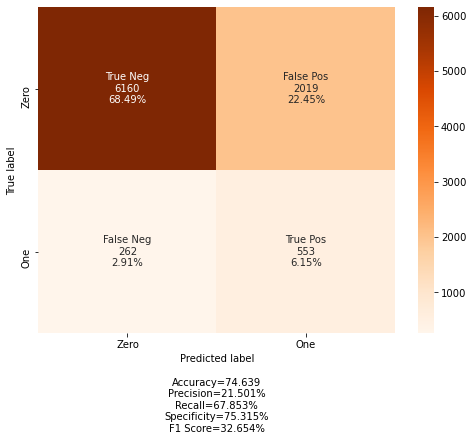

In [301]:
# confusion matrix on the test data - base estimator
# we know it is a weak learner
cm=confusion_matrix(y_test, y_test_pred)
    
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']

make_confusion_matrix(cm, 
                  group_names=labels,
                  categories=categories,
                  figsize=(8,6),
                  cmap='Oranges')

#### Hyper Parameter Tuning

In [302]:
# specify number of folds for gridsearchCV
n_folds = 5
scoring = 'roc_auc'

# parameters to build the model on
parameters = {
              'base_estimator__max_depth': [2,5,7], 
              'n_estimators': [50,100,200]
             }

shallow_tree = DecisionTreeClassifier(random_state=100)

# adaboost with the tree as base estimator
ABC = AdaBoostClassifier(base_estimator=shallow_tree, learning_rate = 0.1)

gridSearch = runGridSearchCV(ABC, X_train_pca, y_train, parameters, n_folds, scoring)

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       3.154581      0.154669         0.030201        0.004035   
1       6.701897      0.060764         0.056293        0.001967   
2      15.004756      1.157521         0.123721        0.012426   
3       7.508822      0.171615         0.034780        0.008054   
4      15.748595      1.299603         0.081151        0.019651   
5      29.073856      2.524678         0.118426        0.027472   
6       8.597660      0.013720         0.029782        0.004115   
7      17.022137      0.035669         0.058572        0.009438   
8      34.636186      0.814646         0.115443        0.020069   

  param_base_estimator__max_depth param_n_estimators  \
0                               2                 50   
1                               2                100   
2                               2                200   
3                               5                 50   
4                               5                

In [303]:
print(pd.DataFrame(gridSearch.cv_results_))

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       3.154581      0.154669         0.030201        0.004035   
1       6.701897      0.060764         0.056293        0.001967   
2      15.004756      1.157521         0.123721        0.012426   
3       7.508822      0.171615         0.034780        0.008054   
4      15.748595      1.299603         0.081151        0.019651   
5      29.073856      2.524678         0.118426        0.027472   
6       8.597660      0.013720         0.029782        0.004115   
7      17.022137      0.035669         0.058572        0.009438   
8      34.636186      0.814646         0.115443        0.020069   

  param_base_estimator__max_depth param_n_estimators  \
0                               2                 50   
1                               2                100   
2                               2                200   
3                               5                 50   
4                               5                

In [304]:
gridSearch.best_params_

{'base_estimator__max_depth': 2, 'n_estimators': 100}

In [305]:
gridSearch.best_estimator_

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=100),
                   learning_rate=0.1, n_estimators=100)

In [306]:
adaboost_best = gridSearch.best_estimator_

In [307]:
adaboost_best.fit(X_train_pca, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=100),
                   learning_rate=0.1, n_estimators=100)

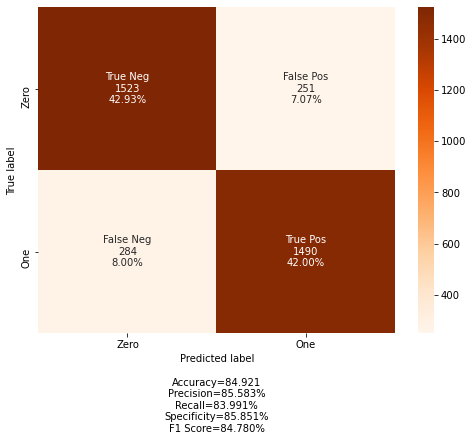

In [308]:
# train score
y_train_pred = adaboost_best.predict(X_train_pca)

# confusion matrix on the test data - base estimator
# we know it is a weak learner
cm=confusion_matrix(y_train, y_train_pred)
    
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']

make_confusion_matrix(cm, 
                  group_names=labels,
                  categories=categories,
                  figsize=(8,6),
                  cmap='Oranges')

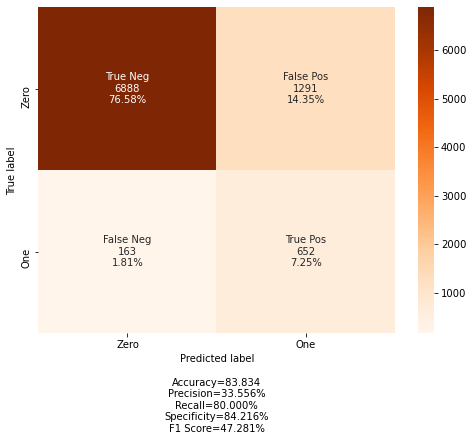

In [309]:
# test score
y_test_pred = adaboost_best.predict(X_test_pca)

# confusion matrix on the test data - base estimator
# we know it is a weak learner
cm=confusion_matrix(y_test, y_test_pred)
    
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']

make_confusion_matrix(cm, 
                  group_names=labels,
                  categories=categories,
                  figsize=(8,6),
                  cmap='Oranges')

#### The following are the best models
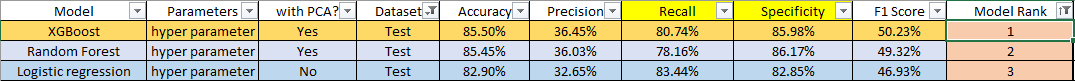

## Analysis and Recommendation based on Logistic Regression Model (Without PCA)
- same content is written after final logistic regression model. Keeping this content here so that, reviewer has not to scroll up
  Please scroll up, to see supportive data for below facts

- Negative coefficients means, this feature has negative effect on churn.
- Positive coefficints means, feature has positive affect in predective churn if rest features are unchanged.
- The loc_ic_mou_8 has high -ve coeff value. It means people who are using the services for local incoming calls, are less likely to churn

### Looking at the coefficients value of logistics regression model, we can conclude with following points
- many of 8th Month feature('Action Phase') have negative coefficients. We can say that if customer is using service in Active Phase (8th month), it is most likely that he will not churn and vice versa.
  Example: From above coeff table data, features like loc_ic_mou_8 and offnet_mou_8 have coefficients values -1.42 and -0.58 respectively
            Negative coefficients means, this feature has negative effect on churn. loc_ic_mou_8 coefficient is -1.42. It means, if customer using loc telecom service, it is most likely that he will not churn

- Below are the 8th month top features for predicting churn (-ve coeff => low value indicates high chances for churn)

    - loc_ic_mou_8
    - offnet_mou_8
    - last_day_rch_amt_8
    - onnet_mou_8
    - max_rech_data_8
    - spl_ic_mou_8
    - total_rech_data_8
    - av_rech_amt_data_6

- srvc_not_used_since_days is very good indicatore for predicting churn. Coeff is +ve. It means, if the customer has not used the service for long days, he is likely to churn
    
    srvc_not_used_since_days	0.512113

- roam_og_mou_8: Roaming Outgoing Minutes of usage
    It has +ve coeff. If roaming usage are more for customer in 8th month, he is likely to churn



